Given informations are about the customers' historical purchase as the amount of money spent, Number of inactive months and so on. Two columns `Potential_Customer` and `Cust_Last_Purchase` represent the customers' respond to the latest promotion. The column `Potential_Customer` represents if the customer purchased any product, and the column `Cust_Last_Purchase` represents the amount of this purchase and it is `Nan` if there has been no purchase.

## Data description
- Below is the description of each feature available in the dataset.
<img src="../images/MicrosoftTeams-image.png" style="height: 700px">

## Objective
**Design a predictive model to determine the potential customers.** The target variable is `Potential_Customer`. 

**Attention:** Because the column `Cust_Last_Purchase` relates to the target variable `Potential_Customer`, you need to exclude it from your model.

#  <font color=green> 0. Import necessary Packages<font>

In [1]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import SCORERS, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# <font color=green> 1. Load the Data into Pandas Dataframe<font>

In [2]:
# Load the data into data dataframe
data = pd.read_csv('../data.csv')

In [3]:
# View first 5 rows of dataframe
data.head().T

,0,1,2,3,4
Potential_Customer,1,1,0,1,1
C_ID,9946,87939,88003,188721,88056
Cust_Last_Purchase,$5.00,$30.00,NaN,$20.00,$5.00
Pur_3_years,2,1,5,1,3
Pur_5_years,17,7,12,11,15
Pur_3_years_Indirect,2,0,3,0,2
Pur_5_years_Indirect,4,3,5,3,7
Pur_latest,$0.00,$25.00,$15.00,$20.00,$3.00
Pur_3_years_Avg,$7.50,$25.00,$15.00,$20.00,$4.33
Pur_5_years_Avg,$7.76,$13.00,$11.25,$12.45,$3.80


In [4]:
# View your data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Potential_Customer,4469.0,0.480868,0.499690,0.0,0.0,0.0,1.0,1.0
C_ID,4469.0,73837.719848,36156.968605,12.0,52713.0,75790.0,93705.0,191672.0
Pur_3_years,4469.0,3.297158,2.207326,0.0,2.0,3.0,4.0,15.0
Pur_5_years,4469.0,11.006042,9.459082,1.0,4.0,9.0,15.0,91.0
Pur_3_years_Indirect,4469.0,1.897516,1.629178,0.0,1.0,2.0,3.0,9.0
Pur_5_years_Indirect,4469.0,5.867756,4.939174,0.0,2.0,4.0,9.0,41.0
InAct_Last,4469.0,17.923697,4.130671,4.0,16.0,18.0,20.0,27.0
InAct_First,4469.0,73.605952,38.094688,15.0,40.0,74.0,111.0,260.0
Ad_Res_1_year,4469.0,13.070038,4.991064,3.0,11.0,12.0,13.0,49.0
Ad_Res_3_Year,4469.0,29.631237,7.787209,5.0,26.0,31.0,34.0,71.0


# <font color=green>2. Data Cleaning<font>
Checking the existance of missing values, the type of variables, or integrity of data. 

## 2.1 Size of the dataset (number of rows, features and total datapoints)

In [5]:
print("Number of rows: ", len(data))
print("Number of columns: ", len(data.columns))
print("Shape of data: ", data.shape)
print("Total datapoints: ", data.size)

Number of rows:  4469
Number of columns:  25
Shape of data:  (4469, 25)
Total datapoints:  111725


In [6]:
data.head(-1)

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,$5.00,2,17,2,4,$0.00,$7.50,$7.76,...,73,3,12,16,A,0,71.0,F,H,"$65,957.00"
1,1,87939,$30.00,1,7,0,3,$25.00,$25.00,$13.00,...,55,6,6,22,A,1,7.0,M,U,$0.00
2,0,88003,NaN,5,12,3,5,$15.00,$15.00,$11.25,...,53,6,17,22,S,1,79.0,F,U,$0.00
3,1,188721,$20.00,1,11,0,3,$20.00,$20.00,$12.45,...,71,8,8,33,A,0,73.0,F,U,"$76,293.00"
4,1,88056,$5.00,3,15,2,7,$3.00,$4.33,$3.80,...,63,6,12,24,S,1,68.0,F,H,"$113,663.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4463,1,103913,$11.00,10,14,7,9,$12.00,$10.70,$9.21,...,38,6,17,17,S,1,43.0,F,U,$0.00
4464,1,103926,$5.00,5,24,3,14,$9.00,$7.80,$6.21,...,71,3,11,28,S,1,17.0,M,H,"$29,081.00"
4465,1,103920,$5.00,4,7,2,2,$5.00,$6.25,$5.71,...,19,4,10,8,A,0,43.0,M,U,"$29,081.00"
4466,1,114820,$10.00,5,17,4,9,$10.00,$8.40,$6.29,...,47,4,13,17,S,1,NaN,F,U,$0.00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

## 2.2 Type of data in each column

In [8]:
data.dtypes

Potential_Customer            int64
C_ID                          int64
Cust_Last_Purchase           object
Pur_3_years                   int64
Pur_5_years                   int64
Pur_3_years_Indirect          int64
Pur_5_years_Indirect          int64
Pur_latest                   object
Pur_3_years_Avg              object
Pur_5_years_Avg              object
Pur_3_years_Avg_Indirect     object
InAct_Last                    int64
InAct_First                   int64
Ad_Res_1_year                 int64
Ad_Res_3_Year                 int64
Ad_Res_5_Year                 int64
Ad_Res_Ind_1_Year             int64
Ad_Res_Ind_3_Year             int64
Ad_Res_Ind_5_Year             int64
Status_Cust                  object
Status_Latest_Ad              int64
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income              object
dtype: object

### 2.2.1 Fix the type of the columns.

Some numerical columns have missing values, Dollar sign, or Comma.

In [9]:
data.head().T

,0,1,2,3,4
Potential_Customer,1,1,0,1,1
C_ID,9946,87939,88003,188721,88056
Cust_Last_Purchase,$5.00,$30.00,NaN,$20.00,$5.00
Pur_3_years,2,1,5,1,3
Pur_5_years,17,7,12,11,15
Pur_3_years_Indirect,2,0,3,0,2
Pur_5_years_Indirect,4,3,5,3,7
Pur_latest,$0.00,$25.00,$15.00,$20.00,$3.00
Pur_3_years_Avg,$7.50,$25.00,$15.00,$20.00,$4.33
Pur_5_years_Avg,$7.76,$13.00,$11.25,$12.45,$3.80


In [10]:
#The following code removes an 'OldSign' and replace it with a 'NewSign': 

data.Cust_Last_Purchase = data.Cust_Last_Purchase.str.replace('$', '')
data.Pur_latest = data.Pur_latest.str.replace('$', '')
data.Pur_3_years_Avg = data.Pur_3_years_Avg.str.replace('$', '')
data.Pur_5_years_Avg = data.Pur_5_years_Avg.str.replace('$', '')
data.Cust_Ann_Income = data.Cust_Ann_Income.str.replace('$', '')
data.Pur_3_years_Avg_Indirect = data.Pur_3_years_Avg_Indirect.str.replace('$', '')

In [11]:
data.Cust_Last_Purchase = data.Cust_Last_Purchase.str.replace(',', '')
data.Pur_latest = data.Pur_latest.str.replace(',', '')
data.Pur_3_years_Avg = data.Pur_3_years_Avg.str.replace(',', '')
data.Pur_5_years_Avg = data.Pur_5_years_Avg.str.replace(',', '')
data.Cust_Ann_Income = data.Cust_Ann_Income.str.replace(',', '')
data.Pur_3_years_Avg_Indirect = data.Pur_3_years_Avg_Indirect.str.replace(',', '')


In [12]:
#Create a list of the name of the categorical columns and the numerical columns

CatCols=['Status_Cust','Gender','Cust_Prop', 'Status_Latest_Ad']
NumCols=list(set(data.columns)-set(CatCols))

In [13]:
CatCols

['Status_Cust', 'Gender', 'Cust_Prop', 'Status_Latest_Ad']

In [14]:
NumCols

['InAct_Last',
 'Ad_Res_Ind_1_Year',
 'Pur_3_years_Avg_Indirect',
 'Pur_3_years_Indirect',
 'C_ID',
 'Pur_latest',
 'Ad_Res_1_year',
 'Pur_3_years_Avg',
 'Pur_3_years',
 'Ad_Res_Ind_5_Year',
 'Ad_Res_Ind_3_Year',
 'Pur_5_years_Indirect',
 'InAct_First',
 'Cust_Ann_Income',
 'Ad_Res_5_Year',
 'Potential_Customer',
 'Pur_5_years_Avg',
 'Age',
 'Cust_Last_Purchase',
 'Ad_Res_3_Year',
 'Pur_5_years']

In [15]:
#Fix the type of the columns

data[CatCols] = data[CatCols].apply(lambda x: x.astype('category'))
data[NumCols] = data[NumCols].apply(lambda x: x.astype('float64'))

In [16]:
data.head().T

,0,1,2,3,4
Potential_Customer,1,1,0,1,1
C_ID,9946,87939,88003,188721,88056
Cust_Last_Purchase,5,30,NaN,20,5
Pur_3_years,2,1,5,1,3
Pur_5_years,17,7,12,11,15
Pur_3_years_Indirect,2,0,3,0,2
Pur_5_years_Indirect,4,3,5,3,7
Pur_latest,0,25,15,20,3
Pur_3_years_Avg,7.5,25,15,20,4.33
Pur_5_years_Avg,7.76,13,11.25,12.45,3.8


In [17]:
data.dtypes

Potential_Customer           float64
C_ID                         float64
Cust_Last_Purchase           float64
Pur_3_years                  float64
Pur_5_years                  float64
Pur_3_years_Indirect         float64
Pur_5_years_Indirect         float64
Pur_latest                   float64
Pur_3_years_Avg              float64
Pur_5_years_Avg              float64
Pur_3_years_Avg_Indirect     float64
InAct_Last                   float64
InAct_First                  float64
Ad_Res_1_year                float64
Ad_Res_3_Year                float64
Ad_Res_5_Year                float64
Ad_Res_Ind_1_Year            float64
Ad_Res_Ind_3_Year            float64
Ad_Res_Ind_5_Year            float64
Status_Cust                 category
Status_Latest_Ad            category
Age                          float64
Gender                      category
Cust_Prop                   category
Cust_Ann_Income              float64
dtype: object

## 2.3 Check data for duplicate rows and remove the duplicates


In [18]:
#True if the row in data is duplicate and False otherwise

duplicates = data.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
4464     True
4465     True
4466     True
4467     True
4468     True
Length: 4469, dtype: bool

In [19]:
#How many duplicates in the data

duplicates.sum()

851

In [20]:
#Remove the duplicates

data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Potential_Customer        3618 non-null   float64 
 1   C_ID                      3618 non-null   float64 
 2   Cust_Last_Purchase        1736 non-null   float64 
 3   Pur_3_years               3618 non-null   float64 
 4   Pur_5_years               3618 non-null   float64 
 5   Pur_3_years_Indirect      3618 non-null   float64 
 6   Pur_5_years_Indirect      3618 non-null   float64 
 7   Pur_latest                3618 non-null   float64 
 8   Pur_3_years_Avg           3618 non-null   float64 
 9   Pur_5_years_Avg           3618 non-null   float64 
 10  Pur_3_years_Avg_Indirect  2956 non-null   float64 
 11  InAct_Last                3618 non-null   float64 
 12  InAct_First               3618 non-null   float64 
 13  Ad_Res_1_year             3618 non-null   float6

## 2.4 Drop the columns that will not use in analysis.



In [21]:
NumCols

['InAct_Last',
 'Ad_Res_Ind_1_Year',
 'Pur_3_years_Avg_Indirect',
 'Pur_3_years_Indirect',
 'C_ID',
 'Pur_latest',
 'Ad_Res_1_year',
 'Pur_3_years_Avg',
 'Pur_3_years',
 'Ad_Res_Ind_5_Year',
 'Ad_Res_Ind_3_Year',
 'Pur_5_years_Indirect',
 'InAct_First',
 'Cust_Ann_Income',
 'Ad_Res_5_Year',
 'Potential_Customer',
 'Pur_5_years_Avg',
 'Age',
 'Cust_Last_Purchase',
 'Ad_Res_3_Year',
 'Pur_5_years']

In [22]:
#Drop the useless column(s)
#Remove the name of the column(s) from NumCols

NumCols.remove('C_ID')

In [23]:
NumCols

['InAct_Last',
 'Ad_Res_Ind_1_Year',
 'Pur_3_years_Avg_Indirect',
 'Pur_3_years_Indirect',
 'Pur_latest',
 'Ad_Res_1_year',
 'Pur_3_years_Avg',
 'Pur_3_years',
 'Ad_Res_Ind_5_Year',
 'Ad_Res_Ind_3_Year',
 'Pur_5_years_Indirect',
 'InAct_First',
 'Cust_Ann_Income',
 'Ad_Res_5_Year',
 'Potential_Customer',
 'Pur_5_years_Avg',
 'Age',
 'Cust_Last_Purchase',
 'Ad_Res_3_Year',
 'Pur_5_years']

# <font color=green>3. Exploratory Data Analysis (EDA)<font>
Checking the relationship betweem variables, summary of data, outliers, filling missing values etc.

## 3.1 Explore Categorical Variables
1. How many categories in each categorical variables?
2. What proportion/percentage from each category?

In [24]:
CatCols

['Status_Cust', 'Gender', 'Cust_Prop', 'Status_Latest_Ad']

In [25]:
data['Status_Cust'].unique()

['A', 'S', 'E', 'F', 'N', 'L']
Categories (6, object): ['A', 'S', 'E', 'F', 'N', 'L']

In [26]:
data['Gender'].unique()

['F', 'M', 'U']
Categories (3, object): ['F', 'M', 'U']

In [27]:
data['Cust_Prop'].unique()

['H', 'U']
Categories (2, object): ['H', 'U']

In [28]:
data['Potential_Customer'].unique()

array([1., 0.])

In [29]:
data['Status_Latest_Ad'].unique()

[0, 1]
Categories (2, int64): [0, 1]

A    2146
S     964
F     219
N     207
E      72
L      10
Name: Status_Cust, dtype: int64
A    59.0
S    27.0
F     6.0
N     6.0
E     2.0
L     0.0
Name: Status_Cust, dtype: float64


<AxesSubplot:title={'center':'Status Customer'}>

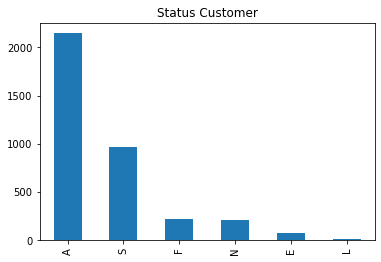

In [30]:
print(data.Status_Cust.value_counts())
print(round(data.Status_Cust.value_counts(normalize = True) * 100))
data.Status_Cust.value_counts().plot.bar(title = "Status Customer")

<AxesSubplot:title={'center':'Status Customer in Percentage'}>

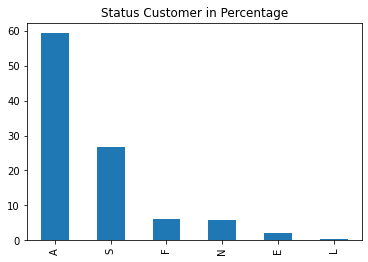

In [31]:
(data.Status_Cust.value_counts(normalize = True) * 100).plot.bar(title = "Status Customer in Percentage")

F    1922
M    1530
U     166
Name: Gender, dtype: int64
F    53.0
M    42.0
U     5.0
Name: Gender, dtype: float64


<AxesSubplot:title={'center':'Gender'}>

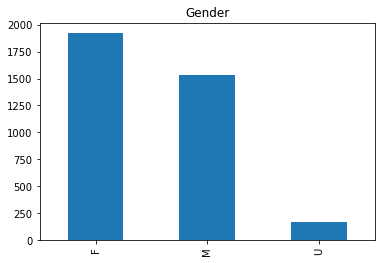

In [32]:
print(data.Gender.value_counts())
print(round(data.Gender.value_counts(normalize = True) * 100))
data.Gender.value_counts().plot.bar(title = "Gender")

<AxesSubplot:title={'center':'Gender in Percentage'}>

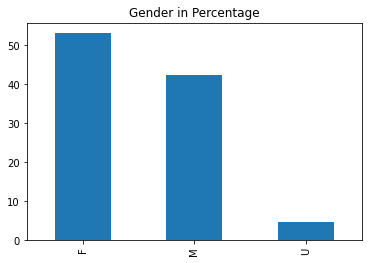

In [33]:
(data.Gender.value_counts(normalize = True) * 100).plot.bar(title = "Gender in Percentage")

H    1981
U    1637
Name: Cust_Prop, dtype: int64
H    55.0
U    45.0
Name: Cust_Prop, dtype: float64


<AxesSubplot:title={'center':'Customer Property'}>

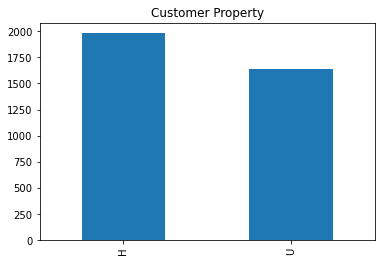

In [34]:
print(data.Cust_Prop.value_counts())
print(round(data.Cust_Prop.value_counts(normalize = True) * 100))
data.Cust_Prop.value_counts().plot.bar(title = "Customer Property")

<AxesSubplot:title={'center':'Customer Property in Percentage'}>

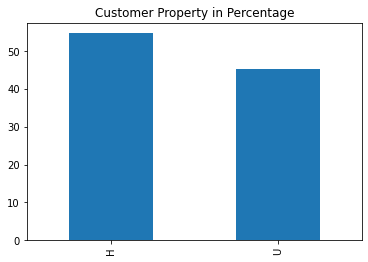

In [35]:
(data.Cust_Prop.value_counts(normalize = True) * 100).plot.bar(title = "Customer Property in Percentage")

1    2057
0    1561
Name: Status_Latest_Ad, dtype: int64
1    57.0
0    43.0
Name: Status_Latest_Ad, dtype: float64


<AxesSubplot:title={'center':'Status Latest Ad'}>

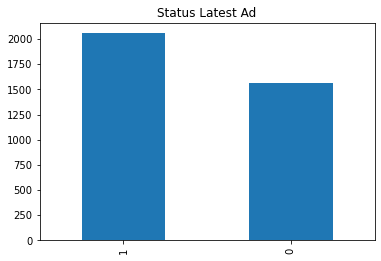

In [36]:
print(data.Status_Latest_Ad.value_counts())
print(round(data.Status_Latest_Ad.value_counts(normalize = True) * 100))
data.Status_Latest_Ad.value_counts().plot.bar(title = "Status Latest Ad")

<AxesSubplot:title={'center':'Status Latest Ad'}>

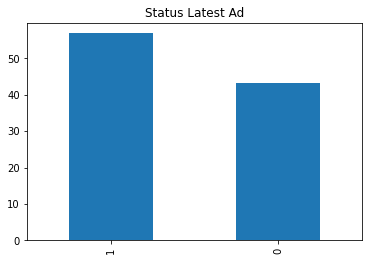

In [37]:
(data.Status_Latest_Ad.value_counts(normalize = True) * 100).plot.bar(title = "Status Latest Ad")

### 3.1.1 Insight

Customer status : We know that the Active and Star buyer is the majority class, while New buyer, Inactive Buyer, First Time Buyer and Lapsing Buyer are all minority. Percentage of both active and star are 86 percent.

While balanced class only 14 percent.

We can split status into two class, active customer (A & S), inactive customer (N,E,I,F,L)

Gender : Unknown gender will not give any significant value to our result. So we either need to remove it, replace it.
To check on unknown gender relationship with potential customer.

Customer Property : Both classes are balanced, but 'unknown' customer property does not mean the customer does not have a house. It might be they renting the house or the data not up to date with the customer property

Status Latest Ad : Customer tends to buy when there is a promotional ads (more than no promotion)

### 3.1.2 Solution

- combine column for status
- remove unknown gender
- check relationship with target variable

In [38]:
data.head().T

,0,1,2,3,4
Potential_Customer,1,1,0,1,1
C_ID,9946,87939,88003,188721,88056
Cust_Last_Purchase,5,30,NaN,20,5
Pur_3_years,2,1,5,1,3
Pur_5_years,17,7,12,11,15
Pur_3_years_Indirect,2,0,3,0,2
Pur_5_years_Indirect,4,3,5,3,7
Pur_latest,0,25,15,20,3
Pur_3_years_Avg,7.5,25,15,20,4.33
Pur_5_years_Avg,7.76,13,11.25,12.45,3.8


In [39]:
data[NumCols]

,InAct_Last,Ad_Res_Ind_1_Year,Pur_3_years_Avg_Indirect,Pur_3_years_Indirect,Pur_latest,Ad_Res_1_year,Pur_3_years_Avg,Pur_3_years,Ad_Res_Ind_5_Year,Ad_Res_Ind_3_Year,Pur_5_years_Indirect,InAct_First,Cust_Ann_Income,Ad_Res_5_Year,Potential_Customer,Pur_5_years_Avg,Age,Cust_Last_Purchase,Ad_Res_3_Year,Pur_5_years
0,14.0,3.0,7.50,2.0,0.0,32.0,7.50,2.0,16.0,12.0,4.0,110.0,65957.0,73.0,1.0,7.76,71.0,5.0,48.0,17.0
1,18.0,6.0,NaN,0.0,25.0,13.0,25.00,1.0,22.0,6.0,3.0,75.0,0.0,55.0,1.0,13.00,7.0,30.0,35.0,7.0
2,19.0,6.0,14.67,3.0,15.0,14.0,15.00,5.0,22.0,17.0,5.0,57.0,0.0,53.0,0.0,11.25,79.0,NaN,35.0,12.0
3,5.0,8.0,NaN,0.0,20.0,17.0,20.00,1.0,33.0,8.0,3.0,113.0,76293.0,71.0,1.0,12.45,73.0,20.0,38.0,11.0
4,17.0,6.0,4.00,2.0,3.0,13.0,4.33,3.0,24.0,12.0,7.0,118.0,113663.0,63.0,1.0,3.80,68.0,5.0,28.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,19.0,6.0,NaN,0.0,20.0,13.0,16.50,2.0,17.0,6.0,1.0,57.0,83754.0,47.0,1.0,13.33,33.0,20.0,34.0,6.0
3614,17.0,6.0,13.25,4.0,13.0,13.0,12.71,7.0,35.0,17.0,21.0,128.0,83754.0,88.0,0.0,10.94,81.0,NaN,32.0,31.0
3615,4.0,7.0,12.50,6.0,3.0,16.0,12.43,7.0,24.0,18.0,8.0,80.0,0.0,57.0,0.0,10.62,39.0,NaN,36.0,13.0
3616,24.0,6.0,20.00,1.0,20.0,11.0,20.00,1.0,25.0,15.0,7.0,93.0,71618.0,61.0,0.0,16.55,76.0,NaN,31.0,11.0


In [40]:
da = data[NumCols]

In [41]:
dataCat = data[CatCols]

In [42]:
dataCat['Status_Cust'].head()

0    A
1    A
2    S
3    A
4    S
Name: Status_Cust, dtype: category
Categories (6, object): ['A', 'E', 'F', 'L', 'N', 'S']

In [43]:
dataCat['Customer_Status'] = dataCat['Status_Cust']

In [44]:
dataCat.head(20)

,Status_Cust,Gender,Cust_Prop,Status_Latest_Ad,Customer_Status
0,A,F,H,0,A
1,A,M,U,1,A
2,S,F,U,1,S
3,A,F,U,0,A
4,S,F,H,1,S
5,A,F,H,1,A
6,A,M,H,1,A
7,A,M,H,0,A
8,S,F,H,1,S
9,S,M,H,1,S


In [45]:
dataCat['Customer_Status'].describe()

count     3618
unique       6
top          A
freq      2146
Name: Customer_Status, dtype: object

In [46]:
dataCat['Customer_Status'].value_counts()

A    2146
S     964
F     219
N     207
E      72
L      10
Name: Customer_Status, dtype: int64

In [47]:
dataCat['Customer_Status'] = dataCat['Customer_Status'].replace({'A':"active"})
dataCat['Customer_Status'] = dataCat['Customer_Status'].replace({'S':"active"})
dataCat['Customer_Status'] = dataCat['Customer_Status'].replace({'F':"inactive"})
dataCat['Customer_Status'] = dataCat['Customer_Status'].replace({'N':"inactive"})
dataCat['Customer_Status'] = dataCat['Customer_Status'].replace({'E':"inactive"})
dataCat['Customer_Status'] = dataCat['Customer_Status'].replace({'L':"inactive"})

In [48]:
dataCat['Customer_Status'].value_counts()

active      3110
inactive     508
Name: Customer_Status, dtype: int64

In [49]:
dataCat['Sex'] = data['Gender']

In [50]:
dataCat['Sex'].value_counts()

F    1922
M    1530
U     166
Name: Sex, dtype: int64

In [51]:
dataCat['Sex'] = dataCat['Sex'].replace({'U':None})

In [52]:
dataCat['Sex'].value_counts()

F    1922
M    1530
Name: Sex, dtype: int64

In [53]:
dataCat['Sex'] = dataCat['Sex'].astype('category')

In [54]:
dataCat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Status_Cust       3618 non-null   category
 1   Gender            3618 non-null   category
 2   Cust_Prop         3618 non-null   category
 3   Status_Latest_Ad  3618 non-null   category
 4   Customer_Status   3618 non-null   object  
 5   Sex               3452 non-null   category
dtypes: category(5), object(1)
memory usage: 74.8+ KB


In [55]:
dataCat.isnull().sum()

Status_Cust           0
Gender                0
Cust_Prop             0
Status_Latest_Ad      0
Customer_Status       0
Sex                 166
dtype: int64

In [56]:
dataCat.dropna()

,Status_Cust,Gender,Cust_Prop,Status_Latest_Ad,Customer_Status,Sex
0,A,F,H,0,active,F
1,A,M,U,1,active,M
2,S,F,U,1,active,F
3,A,F,U,0,active,F
4,S,F,H,1,active,F
...,...,...,...,...,...,...
3613,A,F,H,0,active,F
3614,S,F,H,1,active,F
3615,A,M,U,1,active,M
3616,A,M,H,1,active,M


In [57]:
# tambah sex and active status column
dataCat.shape

(3618, 6)

In [58]:
data.shape

(3618, 25)

## 3.2 Relationship Between Categorical & Target Variable. 


In [59]:
da.head().T

,0,1,2,3,4
InAct_Last,14.00,18.0,19.00,5.00,17.00
Ad_Res_Ind_1_Year,3.00,6.0,6.00,8.00,6.00
Pur_3_years_Avg_Indirect,7.50,NaN,14.67,NaN,4.00
Pur_3_years_Indirect,2.00,0.0,3.00,0.00,2.00
Pur_latest,0.00,25.0,15.00,20.00,3.00
Ad_Res_1_year,32.00,13.0,14.00,17.00,13.00
Pur_3_years_Avg,7.50,25.0,15.00,20.00,4.33
Pur_3_years,2.00,1.0,5.00,1.00,3.00
Ad_Res_Ind_5_Year,16.00,22.0,22.00,33.00,24.00
Ad_Res_Ind_3_Year,12.00,6.0,17.00,8.00,12.00


In [60]:
#Create list of the categorical features

CatFes=list(set(CatCols)-set(['Potential_Customer']))
CatFes

['Cust_Prop', 'Gender', 'Status_Cust', 'Status_Latest_Ad']

In [61]:
data.head(5)

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1.0,9946.0,5.0,2.0,17.0,2.0,4.0,0.0,7.50,7.76,...,73.0,3.0,12.0,16.0,A,0,71.0,F,H,65957.0
1,1.0,87939.0,30.0,1.0,7.0,0.0,3.0,25.0,25.00,13.00,...,55.0,6.0,6.0,22.0,A,1,7.0,M,U,0.0
2,0.0,88003.0,NaN,5.0,12.0,3.0,5.0,15.0,15.00,11.25,...,53.0,6.0,17.0,22.0,S,1,79.0,F,U,0.0
3,1.0,188721.0,20.0,1.0,11.0,0.0,3.0,20.0,20.00,12.45,...,71.0,8.0,8.0,33.0,A,0,73.0,F,U,76293.0
4,1.0,88056.0,5.0,3.0,15.0,2.0,7.0,3.0,4.33,3.80,...,63.0,6.0,12.0,24.0,S,1,68.0,F,H,113663.0


*normalize in 100
female - relationship ads columns
ho - female increase if ads shown (easily manipulated)

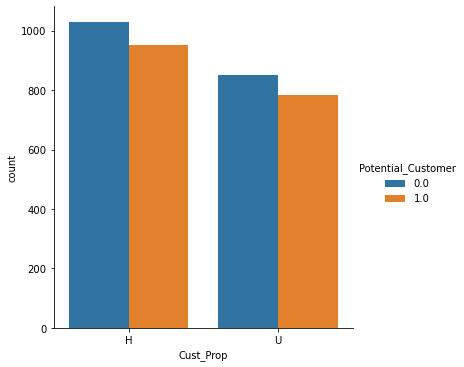

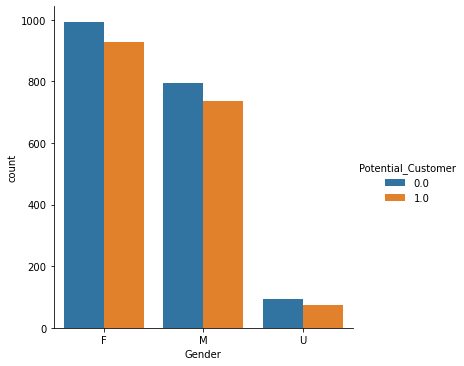

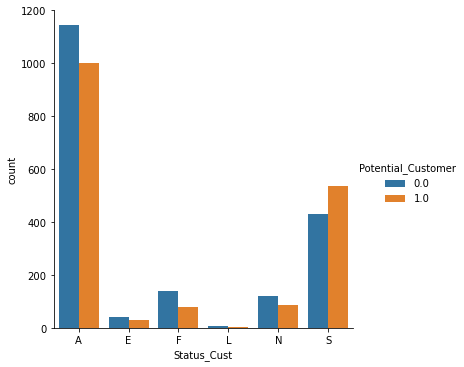

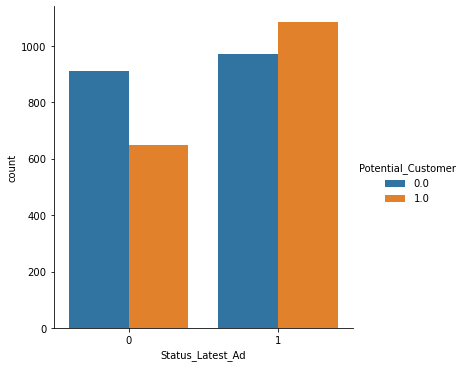

In [62]:
for cat in CatFes:
    sns.catplot(x=cat, hue='Potential_Customer', kind="count", data=data)

### 3.2.1. Insight

Insight: 

In Gender chart, there is only small portion of unknown gender that have potential customer. Also, there is no significant relationship between gender and potential customer. Although Females have higher potential customer count than male, but there is also high count for non potential customer too.

While in Status_Latest_Ad, people who purchased in response of the promotional ads have high count of potential customer, while no responding to ad have higher count of non potential customer.

For status customer, Active and Star customer definitely have higher count of potential customer especially S. While other status have lower potential customer count than their non potential customer count.

We can see in Cust_Property chart, people who own houses have smaller number of count of potential customer, including unknown. There is no clear relationship between Cust_Property with targeted variable.

## 3.3 Explore Numerical Variables


In [63]:
da.head(10).T

,0,1,2,3,4,5,6,7,8,9
InAct_Last,14.00,18.0,19.00,5.00,17.00,16.00,24.00,20.00,24.00,16.00
Ad_Res_Ind_1_Year,3.00,6.0,6.00,8.00,6.00,6.00,6.00,4.00,3.00,6.00
Pur_3_years_Avg_Indirect,7.50,NaN,14.67,NaN,4.00,7.75,18.00,20.00,7.00,14.50
Pur_3_years_Indirect,2.00,0.0,3.00,0.00,2.00,4.00,3.00,1.00,3.00,4.00
Pur_latest,0.00,25.0,15.00,20.00,3.00,10.00,18.00,20.00,5.00,16.00
Ad_Res_1_year,32.00,13.0,14.00,17.00,13.00,14.00,11.00,10.00,6.00,14.00
Pur_3_years_Avg,7.50,25.0,15.00,20.00,4.33,7.75,18.00,20.00,7.75,14.50
Pur_3_years,2.00,1.0,5.00,1.00,3.00,4.00,3.00,1.00,4.00,4.00
Ad_Res_Ind_5_Year,16.00,22.0,22.00,33.00,24.00,33.00,27.00,14.00,27.00,30.00
Ad_Res_Ind_3_Year,12.00,6.0,17.00,8.00,12.00,16.00,17.00,10.00,14.00,16.00


<AxesSubplot:xlabel='Pur_latest', ylabel='Density'>

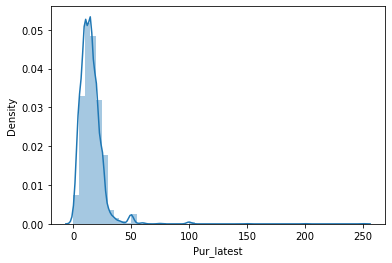

In [64]:
sns.distplot(da['Pur_latest'])

<AxesSubplot:xlabel='Pur_latest'>

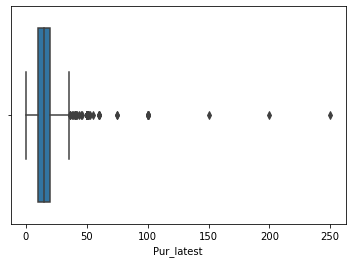

In [65]:
sns.boxplot(da['Pur_latest'])

<AxesSubplot:xlabel='InAct_Last', ylabel='Density'>

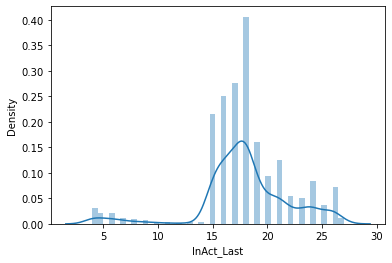

In [66]:
sns.distplot(da['InAct_Last'])

<AxesSubplot:xlabel='InAct_Last'>

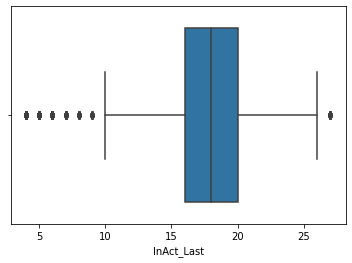

In [67]:
sns.boxplot(da['InAct_Last'])

<AxesSubplot:xlabel='Pur_5_years', ylabel='Density'>

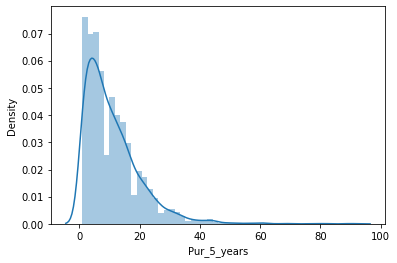

In [68]:
sns.distplot(da['Pur_5_years'])

<AxesSubplot:xlabel='Pur_5_years'>

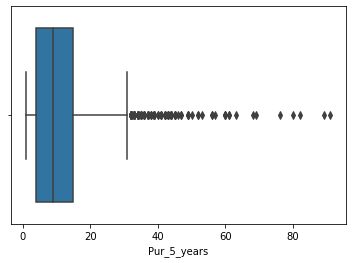

In [69]:
sns.boxplot(da['Pur_5_years'])

<AxesSubplot:xlabel='Pur_3_years', ylabel='Density'>

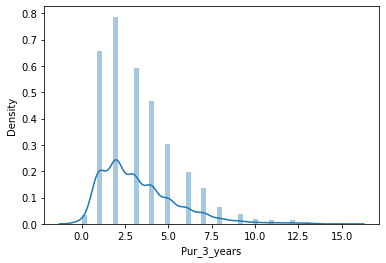

In [70]:
sns.distplot(da['Pur_3_years'])

<AxesSubplot:xlabel='Pur_3_years'>

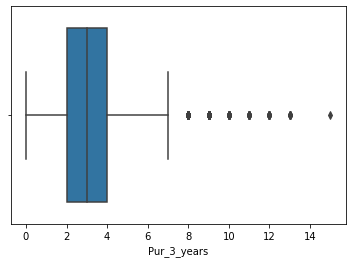

In [71]:
sns.boxplot(da['Pur_3_years'])

<AxesSubplot:xlabel='Pur_3_years_Avg', ylabel='Density'>

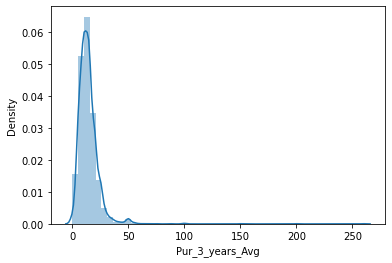

In [72]:
sns.distplot(da['Pur_3_years_Avg'])

<AxesSubplot:xlabel='Pur_3_years_Avg'>

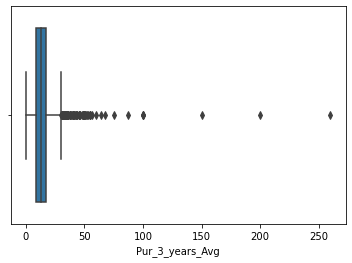

In [73]:
sns.boxplot(da['Pur_3_years_Avg'])

<AxesSubplot:xlabel='Pur_3_years_Avg_Indirect', ylabel='Density'>

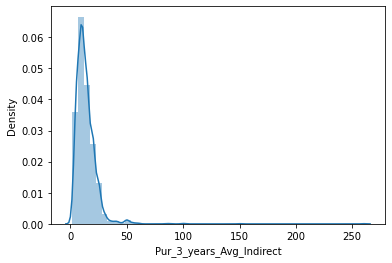

In [74]:
sns.distplot(da['Pur_3_years_Avg_Indirect'])

<AxesSubplot:xlabel='Pur_3_years_Avg_Indirect'>

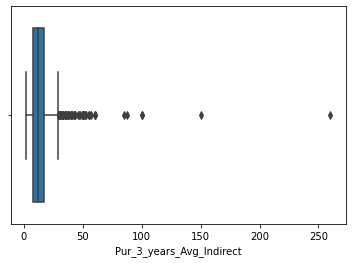

In [75]:
sns.boxplot(da['Pur_3_years_Avg_Indirect'])

<AxesSubplot:xlabel='Pur_5_years_Indirect', ylabel='Density'>

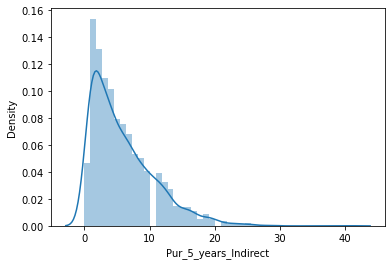

In [76]:
sns.distplot(da['Pur_5_years_Indirect'])

<AxesSubplot:xlabel='Pur_5_years_Indirect'>

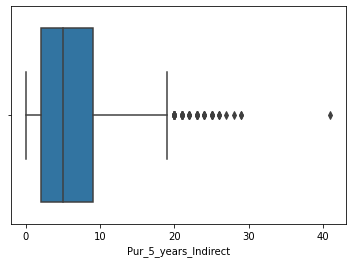

In [77]:
sns.boxplot(da['Pur_5_years_Indirect'])

<AxesSubplot:xlabel='Ad_Res_1_year', ylabel='Density'>

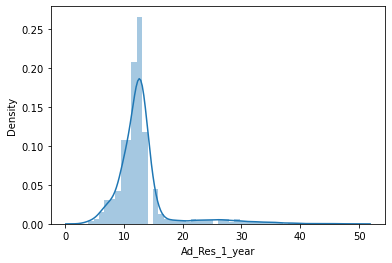

In [78]:
sns.distplot(da['Ad_Res_1_year'])

<AxesSubplot:xlabel='Ad_Res_1_year'>

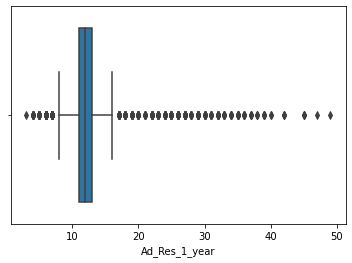

In [79]:
sns.boxplot(da['Ad_Res_1_year'])

<AxesSubplot:xlabel='Ad_Res_3_Year', ylabel='Density'>

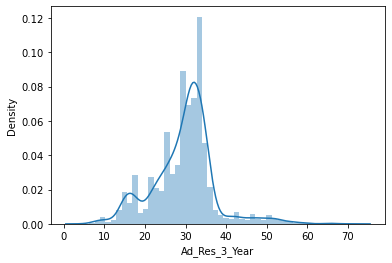

In [80]:
sns.distplot(da['Ad_Res_3_Year'])

<AxesSubplot:xlabel='Ad_Res_3_Year'>

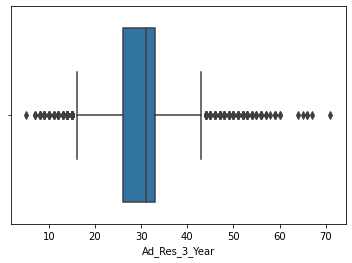

In [81]:
sns.boxplot(da['Ad_Res_3_Year'])

<AxesSubplot:xlabel='Ad_Res_5_Year', ylabel='Density'>

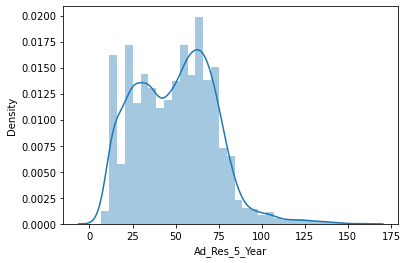

In [82]:
sns.distplot(da['Ad_Res_5_Year'])

<AxesSubplot:xlabel='Ad_Res_5_Year'>

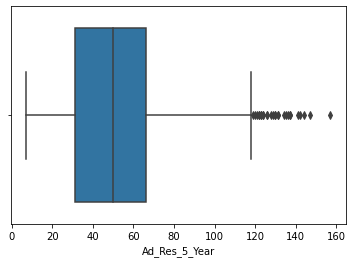

In [83]:
sns.boxplot(da['Ad_Res_5_Year'])

<AxesSubplot:xlabel='Ad_Res_Ind_1_Year', ylabel='Density'>

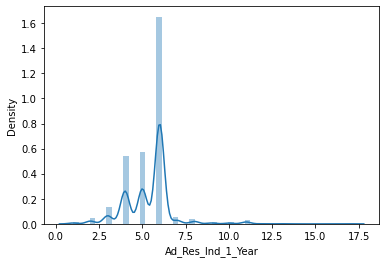

In [84]:
sns.distplot(da['Ad_Res_Ind_1_Year'])

<AxesSubplot:xlabel='Ad_Res_Ind_1_Year'>

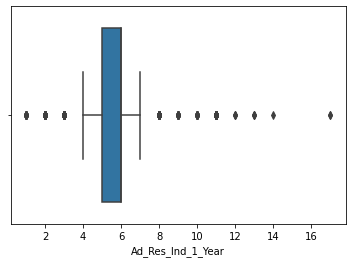

In [85]:
sns.boxplot(da['Ad_Res_Ind_1_Year'])

<AxesSubplot:xlabel='Ad_Res_Ind_3_Year', ylabel='Density'>

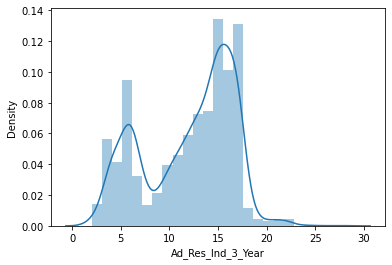

In [86]:
sns.distplot(da['Ad_Res_Ind_3_Year'])

<AxesSubplot:xlabel='Ad_Res_Ind_3_Year'>

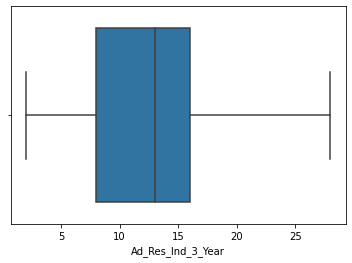

In [87]:
sns.boxplot(da['Ad_Res_Ind_3_Year'])

<AxesSubplot:xlabel='Ad_Res_Ind_5_Year', ylabel='Density'>

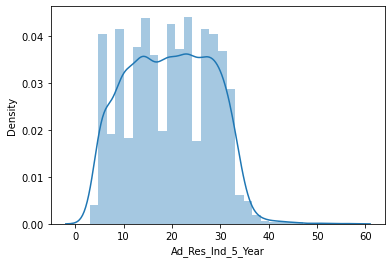

In [88]:
sns.distplot(da['Ad_Res_Ind_5_Year'])

<AxesSubplot:xlabel='Ad_Res_Ind_5_Year'>

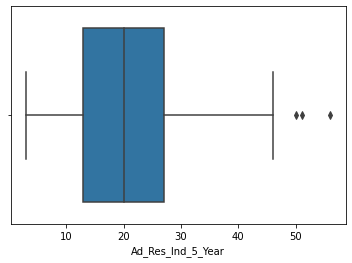

In [89]:
sns.boxplot(da['Ad_Res_Ind_5_Year'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

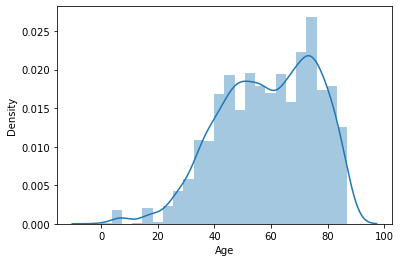

In [90]:
sns.distplot(da['Age'])

<AxesSubplot:xlabel='Age'>

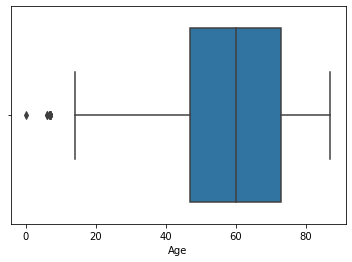

In [91]:
sns.boxplot(da['Age'])

<AxesSubplot:xlabel='Cust_Ann_Income', ylabel='Density'>

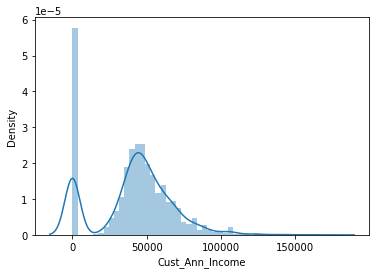

In [92]:
sns.distplot(da['Cust_Ann_Income'])

<AxesSubplot:xlabel='Cust_Ann_Income'>

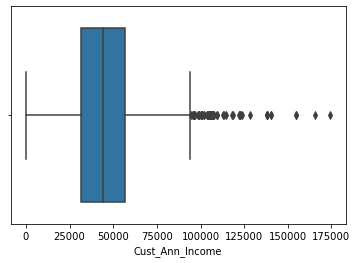

In [93]:
sns.boxplot(da['Cust_Ann_Income'])

<AxesSubplot:xlabel='InAct_First', ylabel='Density'>

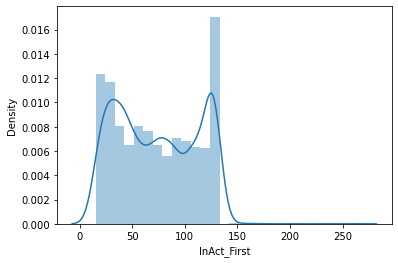

In [94]:
sns.distplot(da['InAct_First'])

<AxesSubplot:xlabel='InAct_First'>

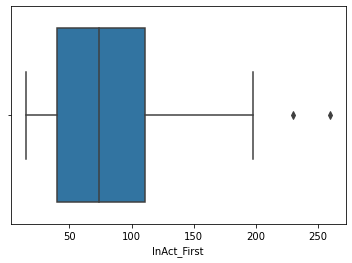

In [95]:
sns.boxplot(da['InAct_First'])

### 3.3.1 Insight

Insight: 


Most numerical value have shape of skewed normal distribution. Outliers are also present in the data. We may need to transform or scale the variables to cater the outliers and fix the distribution shape.

## 3.3.2 Check the Data for Missing Values
**Hint:**
1. Check which columns have missing values

2. Create a list of the name of the columns that have missing values
    `null_columns=data.columns[data.isnull().any()]`
   
3. Decide how you should handle the missing values for each column:

    a. For some numerical columns missing value simply means 0.
    b. We can fill missing values in a numerical column by replacing mean of the column, if the column is not skewed. If the column is skewed, median might be a better option.

<AxesSubplot:>

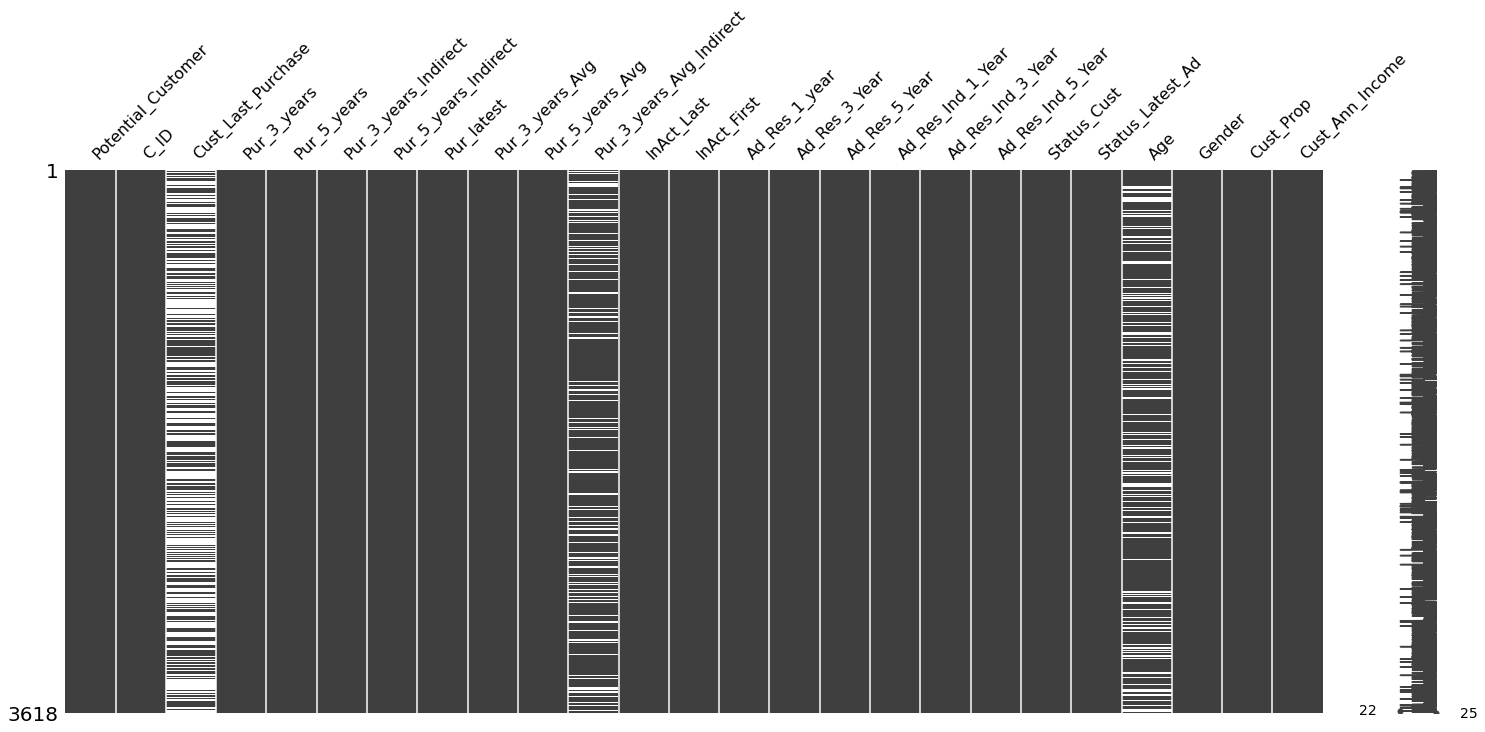

In [96]:
import missingno as msno
msno.matrix(data)

In [97]:
data.isnull().sum()

Potential_Customer             0
C_ID                           0
Cust_Last_Purchase          1882
Pur_3_years                    0
Pur_5_years                    0
Pur_3_years_Indirect           0
Pur_5_years_Indirect           0
Pur_latest                     0
Pur_3_years_Avg                0
Pur_5_years_Avg                0
Pur_3_years_Avg_Indirect     662
InAct_Last                     0
InAct_First                    0
Ad_Res_1_year                  0
Ad_Res_3_Year                  0
Ad_Res_5_Year                  0
Ad_Res_Ind_1_Year              0
Ad_Res_Ind_3_Year              0
Ad_Res_Ind_5_Year              0
Status_Cust                    0
Status_Latest_Ad               0
Age                          793
Gender                         0
Cust_Prop                      0
Cust_Ann_Income                0
dtype: int64

In [98]:
#Create a list of the name of the columns that have missing values

null_columns=data.columns[data.isnull().any()]
null_columns

Index(['Cust_Last_Purchase', 'Pur_3_years_Avg_Indirect', 'Age'], dtype='object')

<AxesSubplot:xlabel='Pur_3_years_Avg_Indirect', ylabel='Density'>

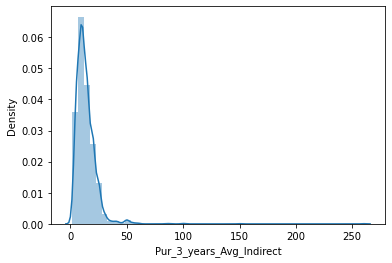

In [99]:
sns.distplot(data['Pur_3_years_Avg_Indirect'], label='Pur_3_years_Avg_Indirect')

<AxesSubplot:xlabel='Age', ylabel='Density'>

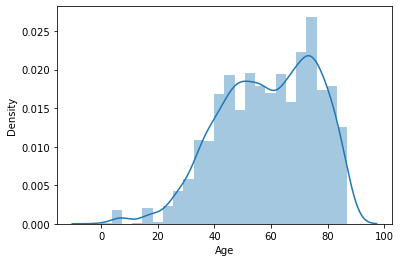

In [100]:
sns.distplot(data['Age'], label='Age')

In [101]:
#fill missing values in a numerical column by replacing median of the column because of the skewness

Median_Pur_3_years_Avg_Indirect = round(data["Pur_3_years_Avg_Indirect"].median(),2)
data["Pur_3_years_Avg_Indirect"].fillna(Median_Pur_3_years_Avg_Indirect,inplace=True)

Median_Age = round(data["Age"].median(),2)
data["Age"].fillna(Median_Age,inplace=True)

<AxesSubplot:xlabel='Pur_3_years_Avg_Indirect', ylabel='Density'>

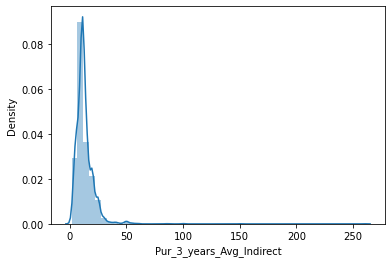

In [102]:
sns.distplot(data['Pur_3_years_Avg_Indirect'], label='Pur_3_years_Avg_Indirect')

<AxesSubplot:xlabel='Age', ylabel='Density'>

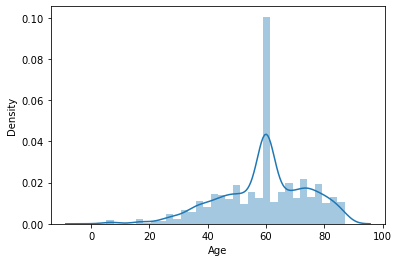

In [103]:
sns.distplot(data['Age'], label='Age')

## 3.4 Explore the Relationship between Numerical Variables & Target Variable. 

In [104]:
NumCols

['InAct_Last',
 'Ad_Res_Ind_1_Year',
 'Pur_3_years_Avg_Indirect',
 'Pur_3_years_Indirect',
 'Pur_latest',
 'Ad_Res_1_year',
 'Pur_3_years_Avg',
 'Pur_3_years',
 'Ad_Res_Ind_5_Year',
 'Ad_Res_Ind_3_Year',
 'Pur_5_years_Indirect',
 'InAct_First',
 'Cust_Ann_Income',
 'Ad_Res_5_Year',
 'Potential_Customer',
 'Pur_5_years_Avg',
 'Age',
 'Cust_Last_Purchase',
 'Ad_Res_3_Year',
 'Pur_5_years']

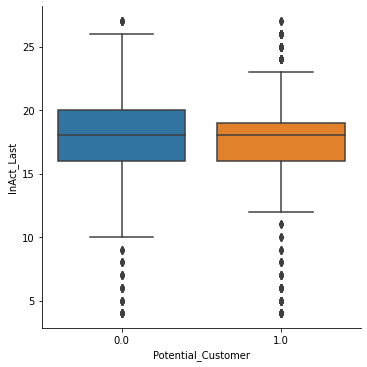

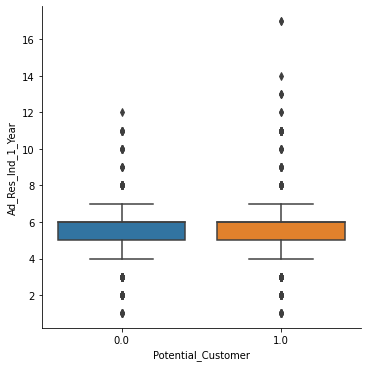

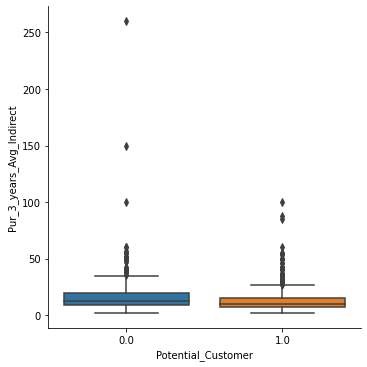

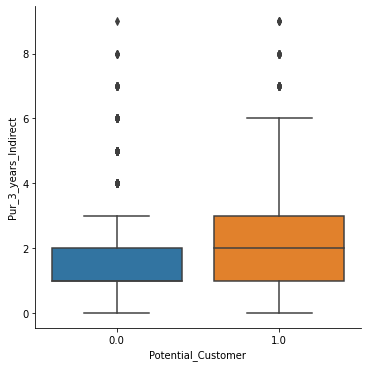

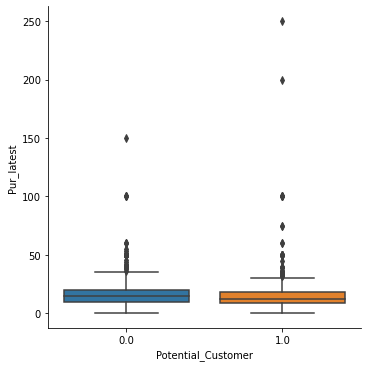

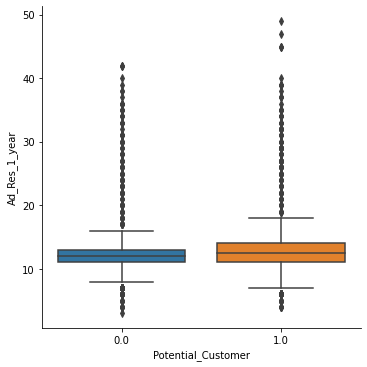

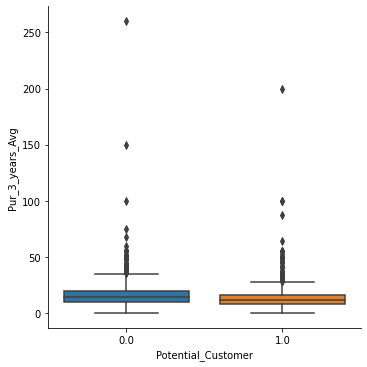

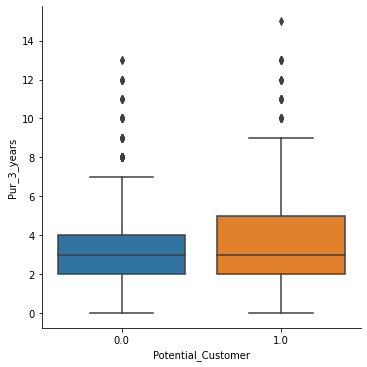

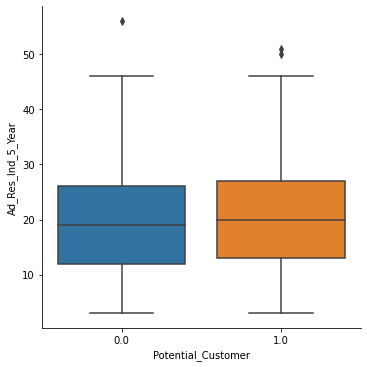

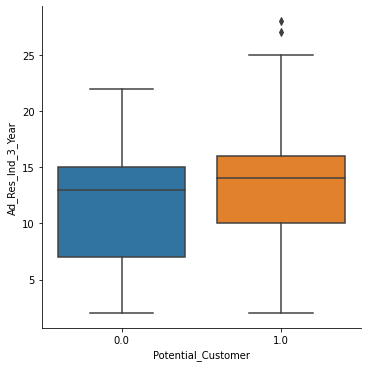

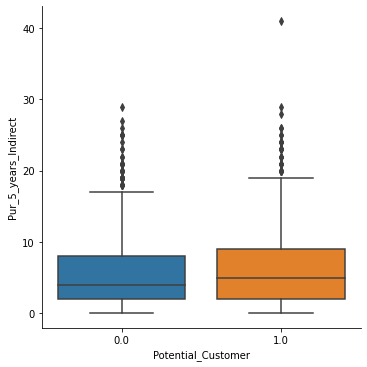

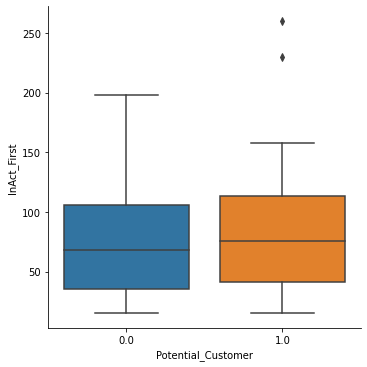

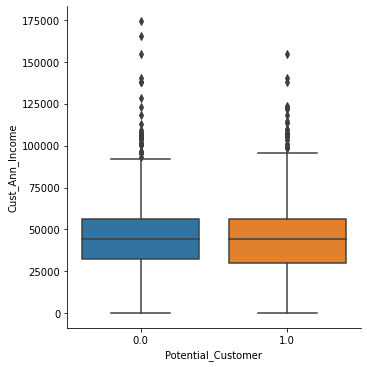

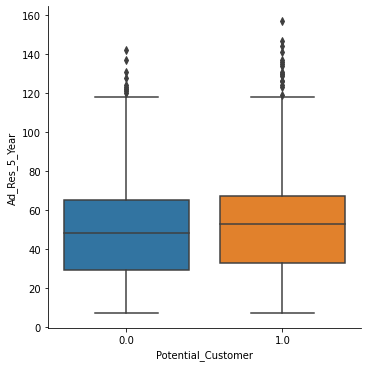

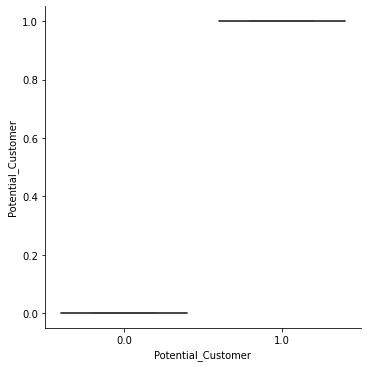

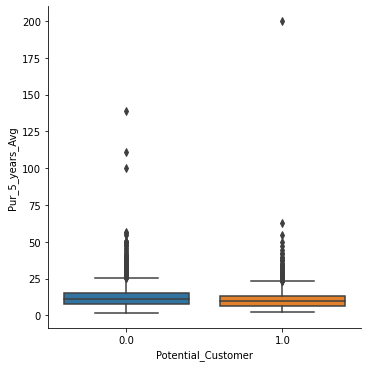

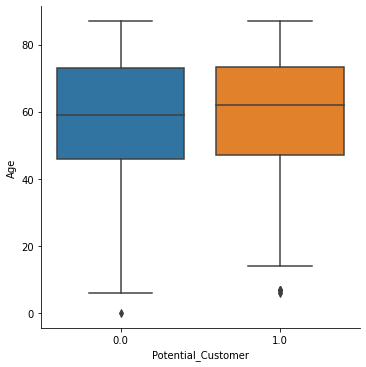

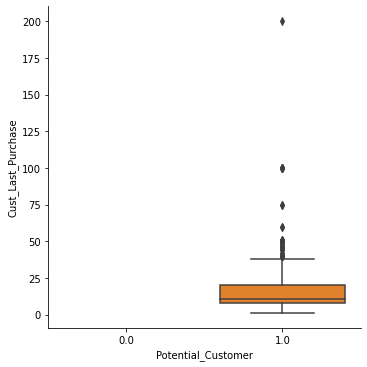

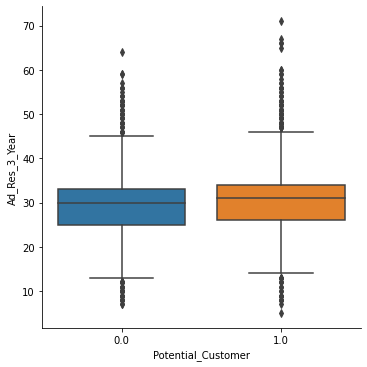

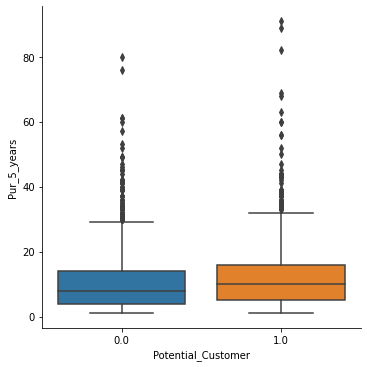

In [105]:
for n in NumCols:
    sns.catplot(x='Potential_Customer', y=n, kind="box",data=da)

Insight :

Most numerical variables has noises and contains many outliers. There are not much relationship that can be observed from the boxplots. Some variable has bigger count number for non potential customer which is opposite to our objective. Mean and quartiles of each variables are almost similar to each other. However, some of the numerical variables, such as pur_3_years_indirect and pur_3_years have slight change for both potential and non potential customer.

## 3.5 Explore the Relationship between the columns:

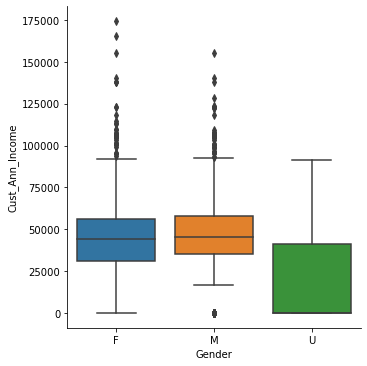

In [106]:
#Is there any significant difference between men/women's salary?

sns.catplot(x="Gender", y="Cust_Ann_Income", kind = "box", data=data)

Insight:

No significant difference of income by both female and male gender

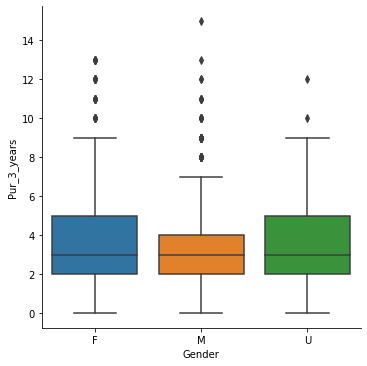

In [107]:
#Is there any significant difference between men/women's number of the purchase in the last three years?

sns.catplot(x="Gender", y="Pur_3_years", kind="box", data=data)

Insight:

Mean of no of purchase in last 3 years are almost similar. But female gender has higher count of purchase for some of its datapoints.

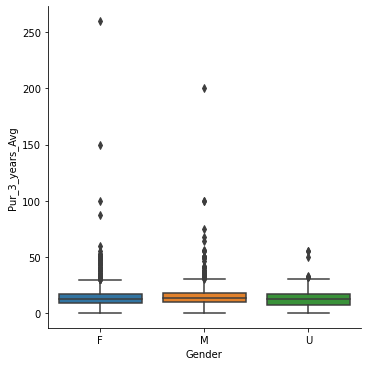

In [108]:
#Is there any significant difference between men/women's average purchase in the last three years?

sns.catplot(x="Gender", y="Pur_3_years_Avg", kind="box", data=data)

Insight:

Boxplot shows both gender have no significant difference in terms of average no of purchase for the past 3 years.

In [109]:
# create new column from multiplaction between two column
data["Total_pur_3_years"] = data["Pur_3_years"] * data["Pur_3_years_Avg"]

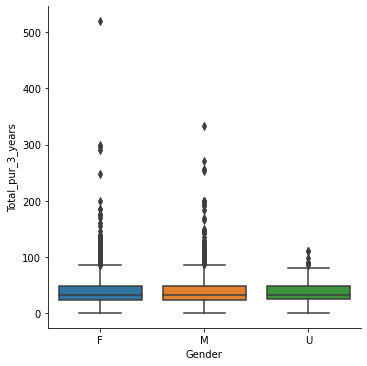

In [110]:
sns.catplot(x="Gender", y="Total_pur_3_years", kind="box", data=data)

Insight:

Total number of purchases from the past 3 years derived from average and no of purchase also does not show any significant difference between them.

# <font color=green>4. Feature Enginearing<font>

## 4.1 Using Some High Level Features and explore their relationship with the target variable

Instead of two variables for the number of purchase, and the average amount of purchase, it could calculated by the total amount of purchase for the customers. 

# Numerical Variable

In [111]:
da.head()

,InAct_Last,Ad_Res_Ind_1_Year,Pur_3_years_Avg_Indirect,Pur_3_years_Indirect,Pur_latest,Ad_Res_1_year,Pur_3_years_Avg,Pur_3_years,Ad_Res_Ind_5_Year,Ad_Res_Ind_3_Year,Pur_5_years_Indirect,InAct_First,Cust_Ann_Income,Ad_Res_5_Year,Potential_Customer,Pur_5_years_Avg,Age,Cust_Last_Purchase,Ad_Res_3_Year,Pur_5_years
0,14.0,3.0,7.50,2.0,0.0,32.0,7.50,2.0,16.0,12.0,4.0,110.0,65957.0,73.0,1.0,7.76,71.0,5.0,48.0,17.0
1,18.0,6.0,NaN,0.0,25.0,13.0,25.00,1.0,22.0,6.0,3.0,75.0,0.0,55.0,1.0,13.00,7.0,30.0,35.0,7.0
2,19.0,6.0,14.67,3.0,15.0,14.0,15.00,5.0,22.0,17.0,5.0,57.0,0.0,53.0,0.0,11.25,79.0,NaN,35.0,12.0
3,5.0,8.0,NaN,0.0,20.0,17.0,20.00,1.0,33.0,8.0,3.0,113.0,76293.0,71.0,1.0,12.45,73.0,20.0,38.0,11.0
4,17.0,6.0,4.00,2.0,3.0,13.0,4.33,3.0,24.0,12.0,7.0,118.0,113663.0,63.0,1.0,3.80,68.0,5.0,28.0,15.0


In [112]:
da.corr()['Potential_Customer'].sort_values(ascending=False)

Potential_Customer          1.000000
Pur_3_years                 0.147106
Pur_3_years_Indirect        0.135133
Pur_5_years_Indirect        0.098305
Pur_5_years                 0.097972
Ad_Res_Ind_3_Year           0.097746
Ad_Res_5_Year               0.080109
Ad_Res_3_Year               0.077662
Ad_Res_Ind_5_Year           0.073056
InAct_First                 0.070813
Ad_Res_Ind_1_Year           0.063209
Ad_Res_1_year               0.053949
Age                         0.042249
Cust_Ann_Income            -0.021580
Pur_latest                 -0.101008
InAct_Last                 -0.103023
Pur_3_years_Avg            -0.103504
Pur_5_years_Avg            -0.111500
Pur_3_years_Avg_Indirect   -0.114940
Cust_Last_Purchase               NaN
Name: Potential_Customer, dtype: float64

In [113]:
# Cust Ann Income
# transform income into discrete variable or bucket (categorical)

da['salary_label'] = pd.qcut(da['Cust_Ann_Income'],3, labels=["Low", "Medium", "High"])
salary_dummies = pd.get_dummies(da.salary_label, prefix="Salary")
salary_dummies_S = salary_dummies.iloc[:,:2]
salary_dummies.head()
da = pd.concat([da, salary_dummies_S], axis=1)


In [114]:
da.corr()['Potential_Customer'].sort_values(ascending=False)

Potential_Customer          1.000000
Pur_3_years                 0.147106
Pur_3_years_Indirect        0.135133
Pur_5_years_Indirect        0.098305
Pur_5_years                 0.097972
Ad_Res_Ind_3_Year           0.097746
Ad_Res_5_Year               0.080109
Ad_Res_3_Year               0.077662
Ad_Res_Ind_5_Year           0.073056
InAct_First                 0.070813
Ad_Res_Ind_1_Year           0.063209
Ad_Res_1_year               0.053949
Age                         0.042249
Salary_Low                  0.014474
Salary_Medium              -0.012518
Cust_Ann_Income            -0.021580
Pur_latest                 -0.101008
InAct_Last                 -0.103023
Pur_3_years_Avg            -0.103504
Pur_5_years_Avg            -0.111500
Pur_3_years_Avg_Indirect   -0.114940
Cust_Last_Purchase               NaN
Name: Potential_Customer, dtype: float64

In [115]:
# Pur 3 years

da.Pur_3_years.describe()

count    3618.000000
mean        3.308734
std         2.185492
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        15.000000
Name: Pur_3_years, dtype: float64

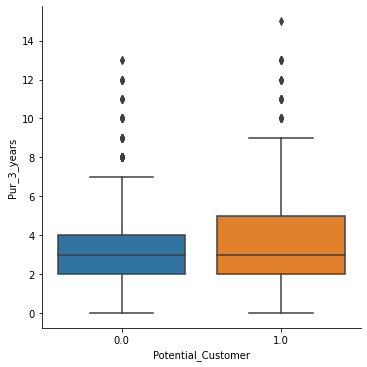

In [116]:
sns.catplot(x='Potential_Customer', y=da.Pur_3_years, kind="box",data=da)

In [117]:
# if 3 SD
(3.308734 + (2.185492 * 3))

9.86521

In [118]:
da.shape

(3618, 23)

In [119]:
da_filtered = da[da['Pur_3_years'] <= 10]

In [120]:
da_filtered.corr()['Potential_Customer']

InAct_Last                 -0.100474
Ad_Res_Ind_1_Year           0.057562
Pur_3_years_Avg_Indirect   -0.114679
Pur_3_years_Indirect        0.132756
Pur_latest                 -0.101005
Ad_Res_1_year               0.048360
Pur_3_years_Avg            -0.102787
Pur_3_years                 0.150477
Ad_Res_Ind_5_Year           0.069746
Ad_Res_Ind_3_Year           0.094766
Pur_5_years_Indirect        0.093936
InAct_First                 0.069349
Cust_Ann_Income            -0.020218
Ad_Res_5_Year               0.075855
Potential_Customer          1.000000
Pur_5_years_Avg            -0.110572
Age                         0.043930
Cust_Last_Purchase               NaN
Ad_Res_3_Year               0.073017
Pur_5_years                 0.094610
Salary_Low                  0.012507
Salary_Medium              -0.010985
Name: Potential_Customer, dtype: float64

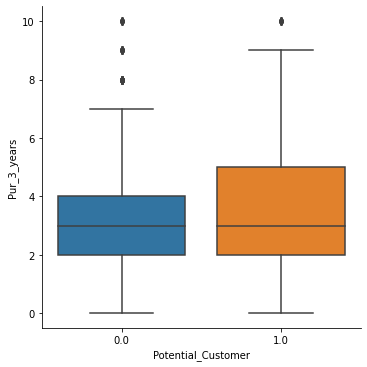

In [121]:
sns.catplot(x='Potential_Customer', y=da_filtered.Pur_3_years, kind="box",data=da)

# using log, sqrt, exp, rec, boxcox

In [122]:
dfayie = da.copy()

In [123]:
import scipy.stats as stats
import pylab

def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

# pur_3_years

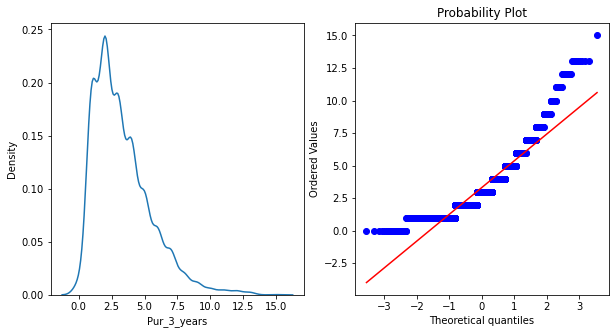

0.1471060158084758


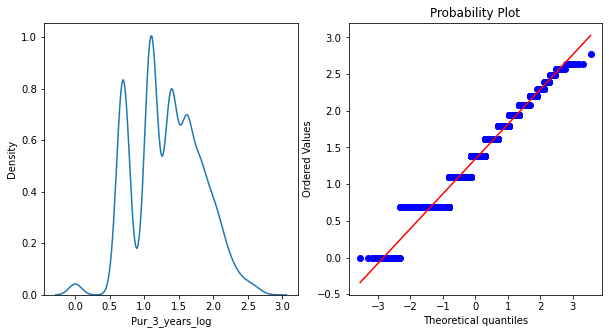

0.1471060158084758
0.15091200843397634


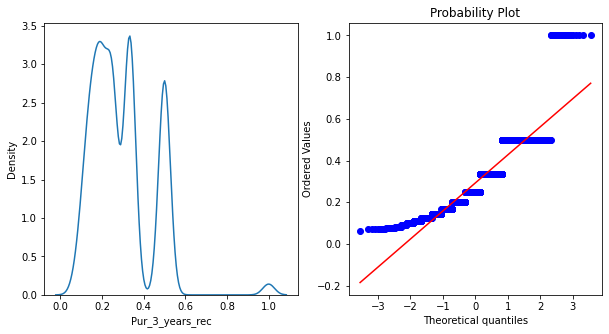

0.1471060158084758
-0.1396152162307005


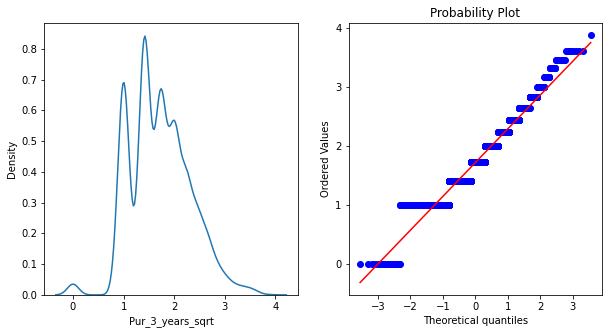

0.1471060158084758
0.15127183576879813


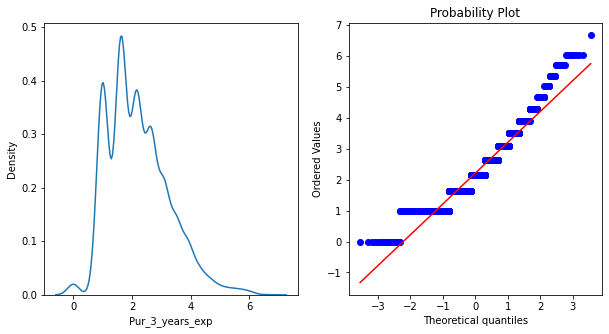

0.1471060158084758
0.1505619425968092


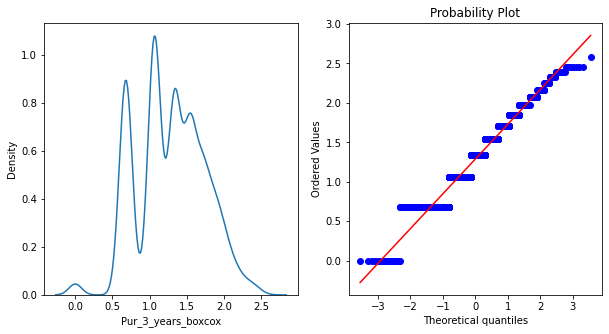

0.1471060158084758
0.15067870772874528

Pur_3_years
0.1471060158084758
log  0.15091200843397634
rec  -0.1396152162307005
sqrt  0.15127183576879813
exp  0.1505619425968092
boxcox 0.15067870772874528


In [124]:
# pur_3_years variable

normality(dfayie,'Pur_3_years')
print(dfayie['Pur_3_years'].corr(dfayie['Potential_Customer']))

# transform data
# using log

dfayie['Pur_3_years_log']=np.log(dfayie['Pur_3_years']+1)
normality(dfayie,'Pur_3_years_log')
print(dfayie['Pur_3_years'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_3_years_log'].corr(dfayie['Potential_Customer']))

# transform data
# using reciprocal

dfayie['Pur_3_years_rec'] = 1/(dfayie['Pur_3_years']+1)
normality(dfayie,'Pur_3_years_rec')
print(dfayie['Pur_3_years'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_3_years_rec'].corr(dfayie['Potential_Customer']))


# transform data
# using square root

dfayie['Pur_3_years_sqrt']=np.sqrt(dfayie['Pur_3_years'])
normality(dfayie,'Pur_3_years_sqrt')
print(dfayie['Pur_3_years'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_3_years_sqrt'].corr(dfayie['Potential_Customer']))

# transform data
# using exponential

dfayie['Pur_3_years_exp']=dfayie.Pur_3_years**0.7
normality(dfayie,'Pur_3_years_exp')
print(dfayie['Pur_3_years'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_3_years_exp'].corr(dfayie['Potential_Customer']))


# transform data
# using boxcox

dfayie['Pur_3_years_boxcox'],parameters=stats.boxcox(dfayie['Pur_3_years']+1)
normality(dfayie,'Pur_3_years_boxcox')
print(dfayie['Pur_3_years'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_3_years_boxcox'].corr(dfayie['Potential_Customer']))


# display all correlation result

print("\nPur_3_years")
print(dfayie['Pur_3_years'].corr(dfayie['Potential_Customer']))
print("log ", dfayie['Pur_3_years_log'].corr(dfayie['Potential_Customer']))
print("rec ", dfayie['Pur_3_years_rec'].corr(dfayie['Potential_Customer']))
print("sqrt ", dfayie['Pur_3_years_sqrt'].corr(dfayie['Potential_Customer']))
print("exp " , dfayie['Pur_3_years_exp'].corr(dfayie['Potential_Customer']))
print("boxcox" ,dfayie['Pur_3_years_boxcox'].corr(dfayie['Potential_Customer']))

# pur_5_years

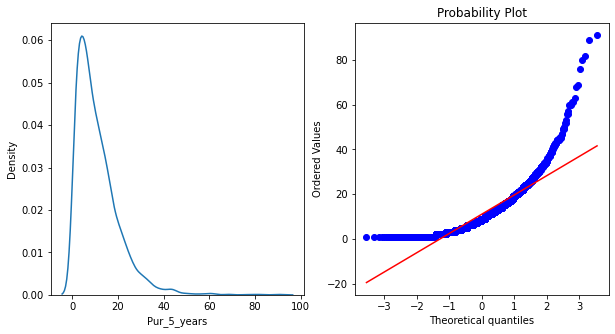

0.09797224101054963


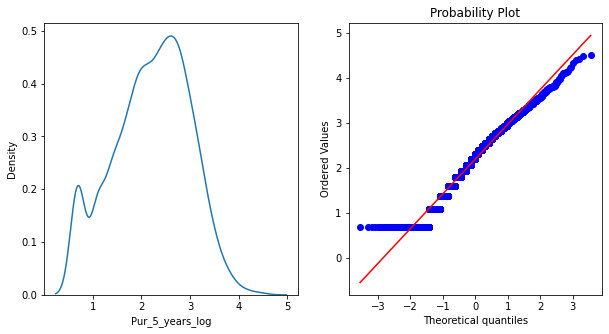

0.09797224101054963
0.12128041010361647


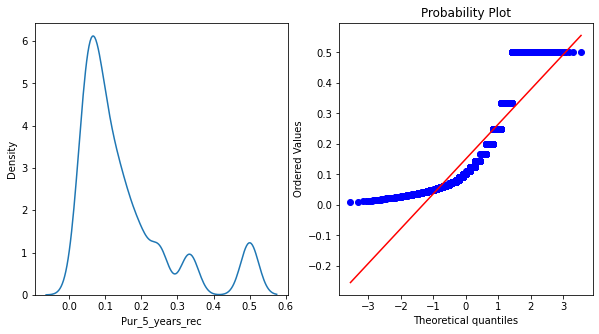

0.09797224101054963
-0.11589698478011662


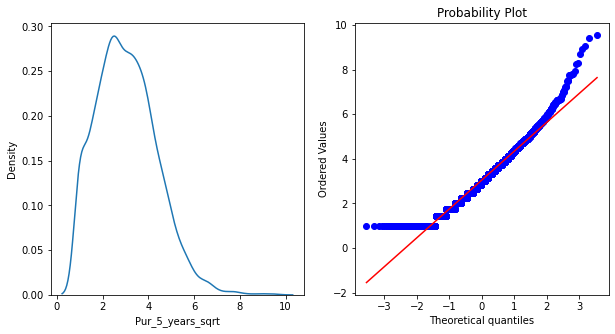

0.09797224101054963
0.11447630598306592


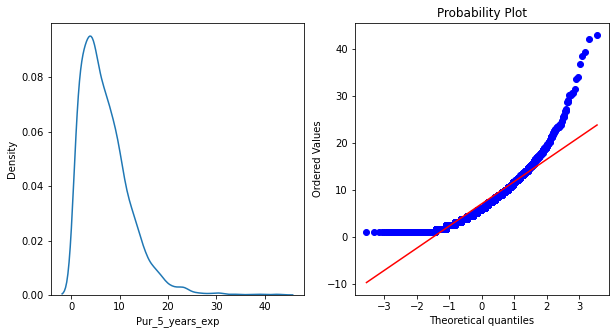

0.09797224101054963
0.104163752755583


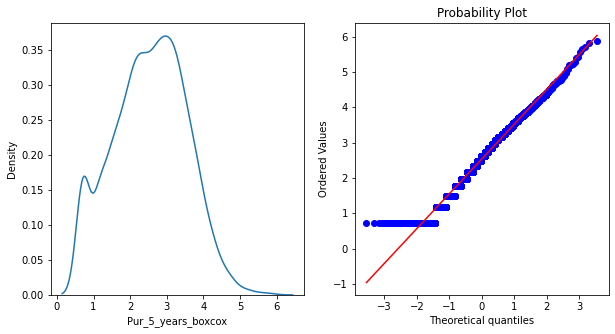

0.09797224101054963
0.12018279229279166

Pur_5_years
0.09797224101054963
log  0.12128041010361647
rec  -0.11589698478011662
sqrt  0.11447630598306592
exp  0.104163752755583
boxcox 0.12018279229279166


In [125]:
# pur_5_years variable

normality(dfayie,'Pur_5_years')
print(dfayie['Pur_5_years'].corr(dfayie['Potential_Customer']))

# transform data
# using log

dfayie['Pur_5_years_log']=np.log((dfayie['Pur_5_years'])+1)
normality(dfayie,'Pur_5_years_log')
print(dfayie['Pur_5_years'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_5_years_log'].corr(dfayie['Potential_Customer']))


# transform data
# using reciprocal

dfayie['Pur_5_years_rec'] = 1/(dfayie['Pur_5_years']+1)
normality(dfayie,'Pur_5_years_rec')
print(dfayie['Pur_5_years'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_5_years_rec'].corr(dfayie['Potential_Customer']))

# transform data
# using square root

dfayie['Pur_5_years_sqrt']=np.sqrt(dfayie['Pur_5_years'])
normality(dfayie,'Pur_5_years_sqrt')
print(dfayie['Pur_5_years'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_5_years_sqrt'].corr(dfayie['Potential_Customer']))


# transform data
# using exponential

dfayie['Pur_5_years_exp']=dfayie['Pur_5_years']**(1/1.2)
normality(dfayie,'Pur_5_years_exp')
print(dfayie['Pur_5_years'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_5_years_exp'].corr(dfayie['Potential_Customer']))

# transform data
# using boxcox

dfayie['Pur_5_years_boxcox'],parameters=stats.boxcox(dfayie['Pur_5_years']+1)
normality(dfayie,'Pur_5_years_boxcox')
print(dfayie['Pur_5_years'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_5_years_boxcox'].corr(dfayie['Potential_Customer']))


# display all correlation result

print("\nPur_5_years")
print(dfayie['Pur_5_years'].corr(dfayie['Potential_Customer']))
print("log ", dfayie['Pur_5_years_log'].corr(dfayie['Potential_Customer']))
print("rec ", dfayie['Pur_5_years_rec'].corr(dfayie['Potential_Customer']))
print("sqrt ", dfayie['Pur_5_years_sqrt'].corr(dfayie['Potential_Customer']))
print("exp " ,dfayie['Pur_5_years_exp'].corr(dfayie['Potential_Customer']))
print("boxcox" ,dfayie['Pur_5_years_boxcox'].corr(dfayie['Potential_Customer']))


# pur_3_years_indirect

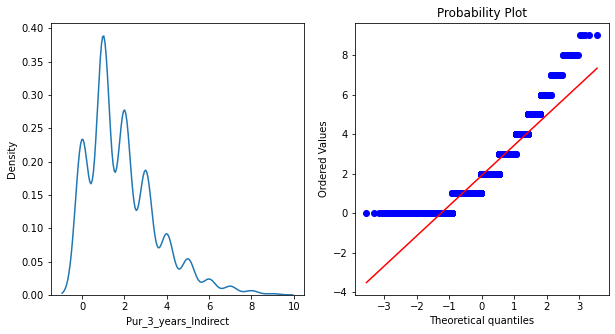

0.1351333707790021


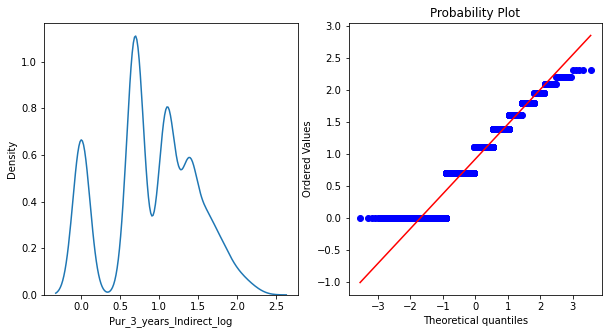

0.1351333707790021
0.12812285549826288


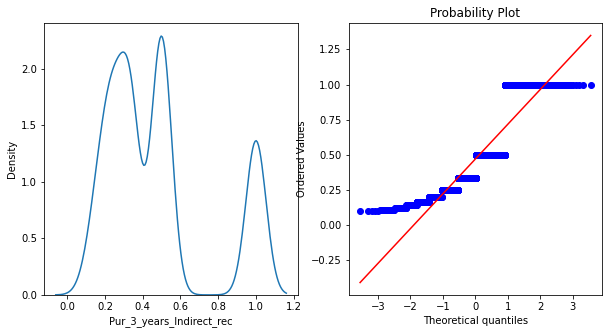

0.1351333707790021
-0.11031677485294954


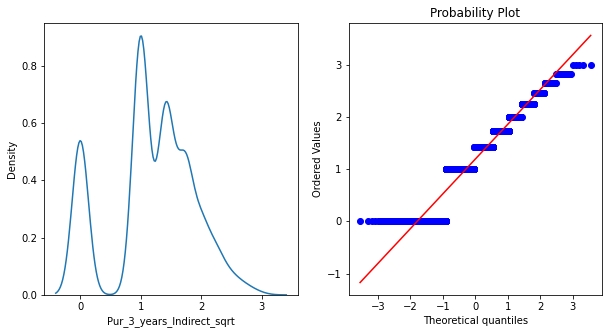

0.1351333707790021
0.12548925027968993


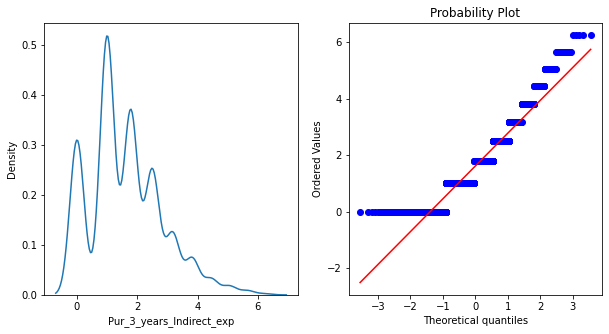

0.1351333707790021
0.13450771865856728


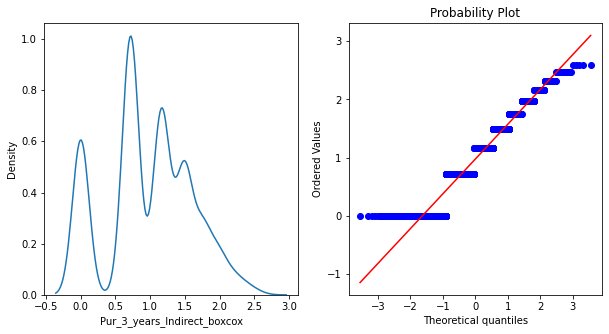

0.1351333707790021
0.1295548128411732
Pur_3_years_Indirect
0.1351333707790021
log  0.12812285549826288
rec  -0.11031677485294954
sqrt  0.12548925027968993
exp  0.13450771865856728
boxcox 0.1295548128411732


In [126]:
# pur_3_years variable

normality(dfayie,'Pur_3_years_Indirect')
print(dfayie['Pur_3_years_Indirect'].corr(dfayie['Potential_Customer']))

# transform data
# using log

dfayie['Pur_3_years_Indirect_log']=np.log(dfayie['Pur_3_years_Indirect']+1)
normality(dfayie,'Pur_3_years_Indirect_log')
print(dfayie['Pur_3_years_Indirect'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_3_years_Indirect_log'].corr(dfayie['Potential_Customer']))

# transform data
# using reciprocal

dfayie['Pur_3_years_Indirect_rec'] = 1/(dfayie['Pur_3_years_Indirect']+1)
normality(dfayie,'Pur_3_years_Indirect_rec')
print(dfayie['Pur_3_years_Indirect'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_3_years_Indirect_rec'].corr(dfayie['Potential_Customer']))

# transform data
# using square root

dfayie['Pur_3_years_Indirect_sqrt']=np.sqrt(dfayie['Pur_3_years_Indirect'])
normality(dfayie,'Pur_3_years_Indirect_sqrt')
print(dfayie['Pur_3_years_Indirect'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_3_years_Indirect_sqrt'].corr(dfayie['Potential_Customer']))

# transform data
# using exponential

dfayie['Pur_3_years_Indirect_exp']=dfayie['Pur_3_years_Indirect']**(1/1.2)
normality(dfayie,'Pur_3_years_Indirect_exp')
print(dfayie['Pur_3_years_Indirect'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_3_years_Indirect_exp'].corr(dfayie['Potential_Customer']))

# transform data
# using boxcox

dfayie['Pur_3_years_Indirect_boxcox'],parameters=stats.boxcox(dfayie['Pur_3_years_Indirect']+1)
normality(dfayie,'Pur_3_years_Indirect_boxcox')
print(dfayie['Pur_3_years_Indirect'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_3_years_Indirect_boxcox'].corr(dfayie['Potential_Customer']))

# display all correlation result

print("Pur_3_years_Indirect")
print(dfayie['Pur_3_years_Indirect'].corr(dfayie['Potential_Customer']))
print("log ", dfayie['Pur_3_years_Indirect_log'].corr(dfayie['Potential_Customer']))
print("rec ", dfayie['Pur_3_years_Indirect_rec'].corr(dfayie['Potential_Customer']))
print("sqrt ", dfayie['Pur_3_years_Indirect_sqrt'].corr(dfayie['Potential_Customer']))
print("exp " , dfayie['Pur_3_years_Indirect_exp'].corr(dfayie['Potential_Customer']))
print("boxcox" , dfayie['Pur_3_years_Indirect_boxcox'].corr(dfayie['Potential_Customer']))

# pur_5_years_indirect

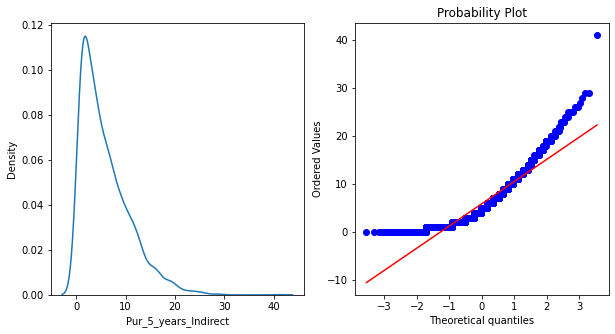

0.09830455623779902


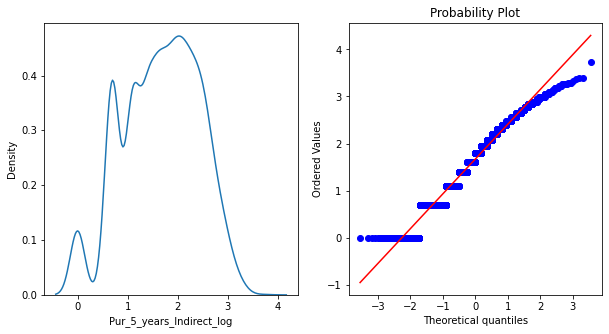

0.09830455623779902
0.11432550429344847


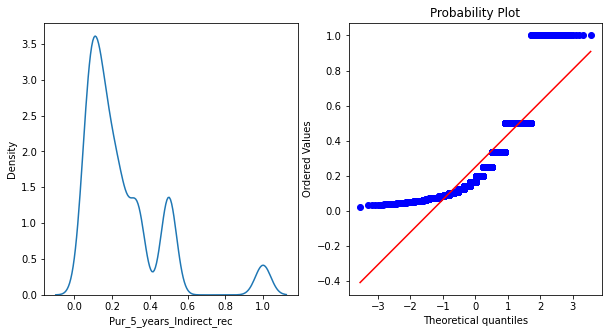

0.09830455623779902
-0.10473664298247273


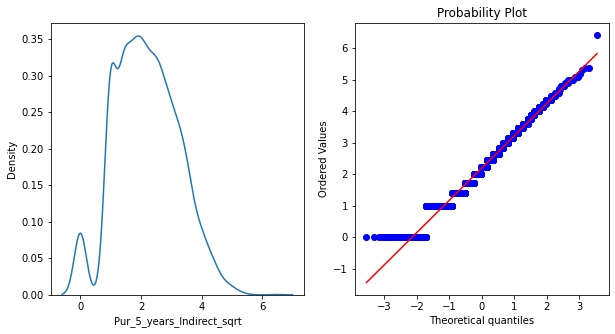

0.09830455623779902
0.11066201959055429


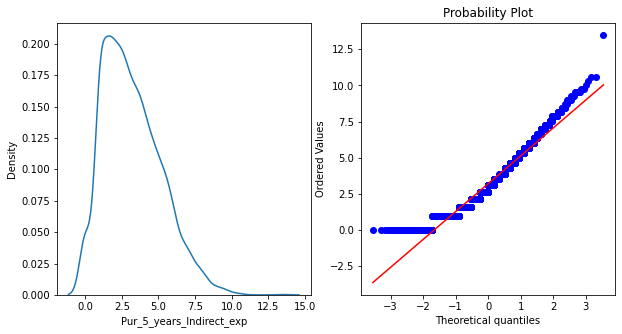

0.09830455623779902
0.10658699362383516


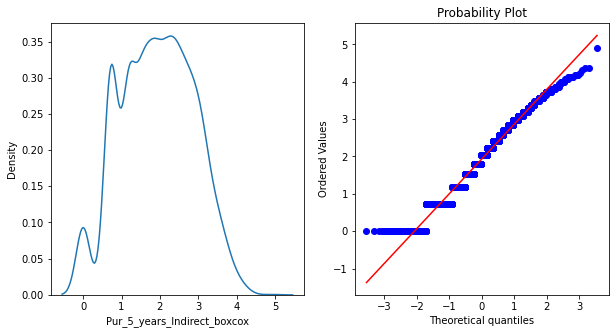

0.09830455623779902
0.11345520808328344
Pur_5_years_Indirect
0.09830455623779902
log  0.11432550429344847
rec  -0.10473664298247273
sqrt  0.11066201959055429
exp  0.10658699362383516
boxcox 0.11345520808328344


In [127]:
# pur_5_years variable

normality(dfayie,'Pur_5_years_Indirect')
print(dfayie['Pur_5_years_Indirect'].corr(dfayie['Potential_Customer']))

# transform data
# using log

dfayie['Pur_5_years_Indirect_log']=np.log(dfayie['Pur_5_years_Indirect']+1)
normality(dfayie,'Pur_5_years_Indirect_log')
print(dfayie['Pur_5_years_Indirect'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_5_years_Indirect_log'].corr(dfayie['Potential_Customer']))

# transform data
# using reciprocal

dfayie['Pur_5_years_Indirect_rec'] = 1/(dfayie['Pur_5_years_Indirect']+1)
normality(dfayie,'Pur_5_years_Indirect_rec')
print(dfayie['Pur_5_years_Indirect'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_5_years_Indirect_rec'].corr(dfayie['Potential_Customer']))

# transform data
# using square root

dfayie['Pur_5_years_Indirect_sqrt']=np.sqrt(dfayie['Pur_5_years_Indirect'])
normality(dfayie,'Pur_5_years_Indirect_sqrt')
print(dfayie['Pur_5_years_Indirect'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_5_years_Indirect_sqrt'].corr(dfayie['Potential_Customer']))

# transform data
# using exponential

dfayie['Pur_5_years_Indirect_exp']=dfayie['Pur_5_years_Indirect']**0.7
normality(dfayie,'Pur_5_years_Indirect_exp')
print(dfayie['Pur_5_years_Indirect'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_5_years_Indirect_exp'].corr(dfayie['Potential_Customer']))

# transform data
# using boxcox

dfayie['Pur_5_years_Indirect_boxcox'],parameters=stats.boxcox(dfayie['Pur_5_years_Indirect']+1)
normality(dfayie,'Pur_5_years_Indirect_boxcox')
print(dfayie['Pur_5_years_Indirect'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_5_years_Indirect_boxcox'].corr(dfayie['Potential_Customer']))

# display all correlation result

print("Pur_5_years_Indirect")
print(dfayie['Pur_5_years_Indirect'].corr(dfayie['Potential_Customer']))
print("log ", dfayie['Pur_5_years_Indirect_log'].corr(dfayie['Potential_Customer']))
print("rec ", dfayie['Pur_5_years_Indirect_rec'].corr(dfayie['Potential_Customer']))
print("sqrt ", dfayie['Pur_5_years_Indirect_sqrt'].corr(dfayie['Potential_Customer']))
print("exp " , dfayie['Pur_5_years_Indirect_exp'].corr(dfayie['Potential_Customer']))
print("boxcox" , dfayie['Pur_5_years_Indirect_boxcox'].corr(dfayie['Potential_Customer']))

# pur_3_years_average

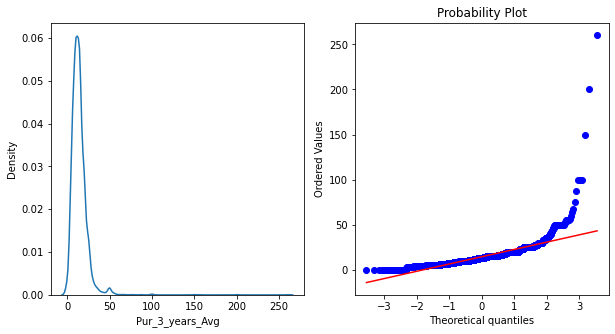

-0.10350393192098015


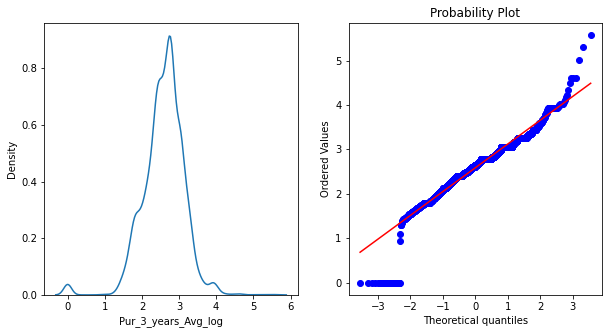

-0.10350393192098015
-0.12066069235446175


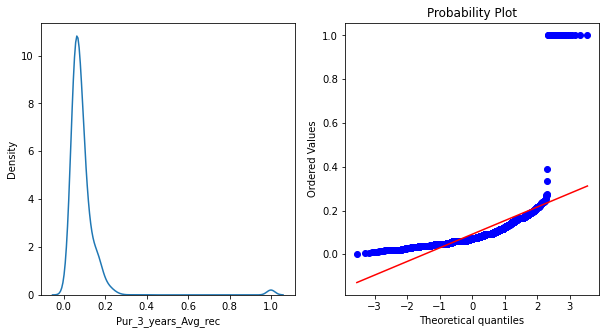

-0.10350393192098015
0.030316859794948966


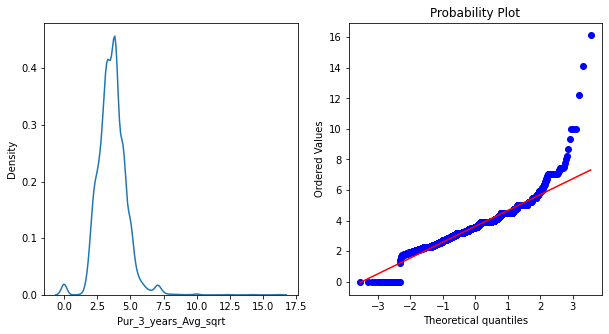

-0.10350393192098015
-0.12228291136892848


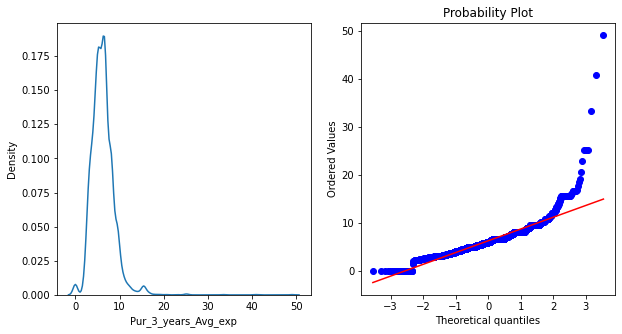

-0.10350393192098015
-0.12014786852735813


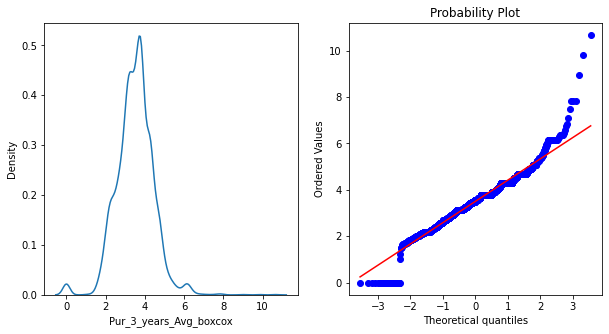

-0.10350393192098015
-0.12701760848653934
Pur_3_years_Avg
-0.10350393192098015
log  -0.12066069235446175
rec  0.030316859794948966
sqrt  -0.12228291136892848
exp  -0.12014786852735813
boxcox  -0.12701760848653934


In [128]:
# pur_3_years variable

normality(dfayie,'Pur_3_years_Avg')
print(dfayie['Pur_3_years_Avg'].corr(dfayie['Potential_Customer']))

# transform data
# using log

dfayie['Pur_3_years_Avg_log']=np.log(dfayie['Pur_3_years_Avg']+1)
normality(dfayie,'Pur_3_years_Avg_log')
print(dfayie['Pur_3_years_Avg'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_3_years_Avg_log'].corr(dfayie['Potential_Customer']))

# transform data
# using reciprocal

dfayie['Pur_3_years_Avg_rec'] = 1/(dfayie['Pur_3_years_Avg']+1)
normality(dfayie,'Pur_3_years_Avg_rec')
print(dfayie['Pur_3_years_Avg'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_3_years_Avg_rec'].corr(dfayie['Potential_Customer']))

# transform data
# using square root

dfayie['Pur_3_years_Avg_sqrt']=np.sqrt(dfayie['Pur_3_years_Avg'])
normality(dfayie,'Pur_3_years_Avg_sqrt')
print(dfayie['Pur_3_years_Avg'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_3_years_Avg_sqrt'].corr(dfayie['Potential_Customer']))

# transform data
# using exponential

dfayie['Pur_3_years_Avg_exp']=dfayie['Pur_3_years_Avg']**0.7
normality(dfayie,'Pur_3_years_Avg_exp')
print(dfayie['Pur_3_years_Avg'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_3_years_Avg_exp'].corr(dfayie['Potential_Customer']))

# transform data
# using boxcox

dfayie['Pur_3_years_Avg_boxcox'],parameters=stats.boxcox(dfayie['Pur_3_years_Avg']+1)
normality(dfayie,'Pur_3_years_Avg_boxcox')
print(dfayie['Pur_3_years_Avg'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_3_years_Avg_boxcox'].corr(dfayie['Potential_Customer']))

# display all correlation result

print("Pur_3_years_Avg")
print(dfayie['Pur_3_years_Avg'].corr(dfayie['Potential_Customer']))
print("log ", dfayie['Pur_3_years_Avg_log'].corr(dfayie['Potential_Customer']))
print("rec ", dfayie['Pur_3_years_Avg_rec'].corr(dfayie['Potential_Customer']))
print("sqrt ", dfayie['Pur_3_years_Avg_sqrt'].corr(dfayie['Potential_Customer']))
print("exp ", dfayie['Pur_3_years_Avg_exp'].corr(dfayie['Potential_Customer']))
print("boxcox ", dfayie['Pur_3_years_Avg_boxcox'].corr(dfayie['Potential_Customer']))

# pur_5_years_average

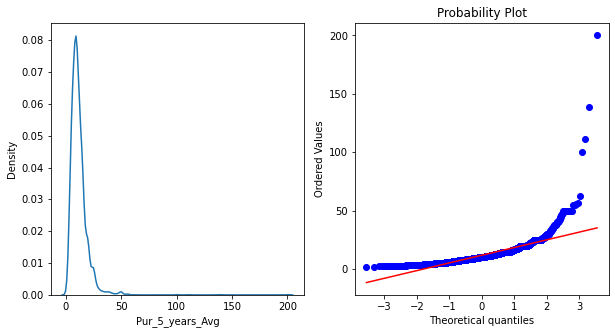

-0.11149970784739276


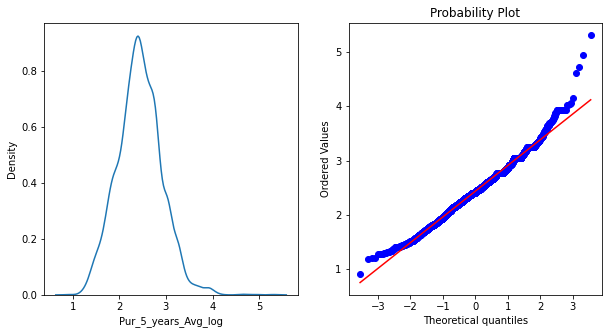

-0.11149970784739276
-0.1483313403895393


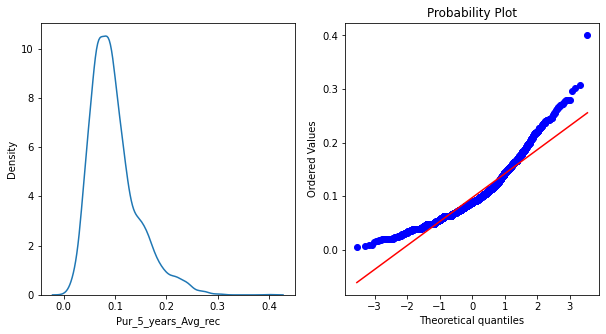

-0.11149970784739276
0.14876579158868877


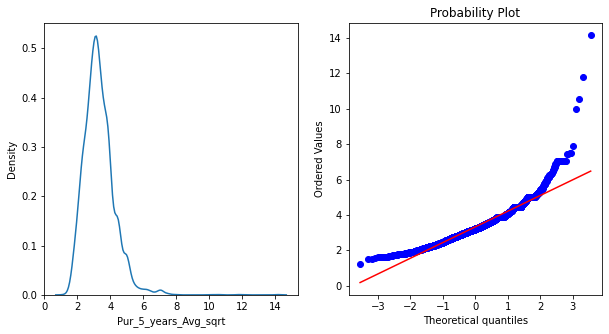

-0.11149970784739276
-0.13807917944511267


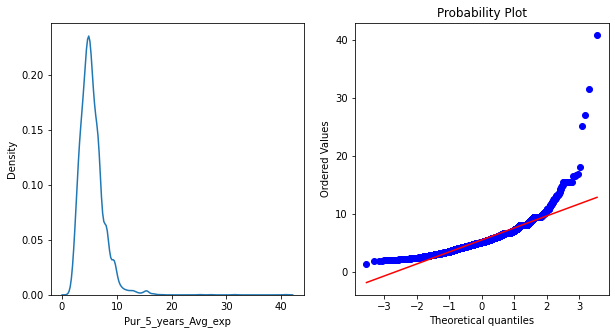

-0.11149970784739276
-0.12970964271187319


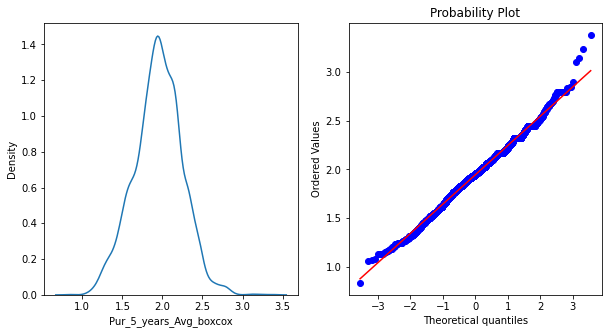

-0.11149970784739276
-0.15021260344091883
Pur_5_years_Avg
-0.11149970784739276
log  -0.1483313403895393
rec  0.14876579158868877
sqrt  -0.13807917944511267
exp  -0.12970964271187319
boxcox  -0.15021260344091883


In [129]:
# pur_3_years variable

normality(dfayie,'Pur_5_years_Avg')
print(dfayie['Pur_5_years_Avg'].corr(dfayie['Potential_Customer']))

# transform data
# using log

dfayie['Pur_5_years_Avg_log']=np.log(dfayie['Pur_5_years_Avg']+1)
normality(dfayie,'Pur_5_years_Avg_log')
print(dfayie['Pur_5_years_Avg'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_5_years_Avg_log'].corr(dfayie['Potential_Customer']))

# transform data
# using reciprocal

dfayie['Pur_5_years_Avg_rec'] = 1/(dfayie['Pur_5_years_Avg']+1)
normality(dfayie,'Pur_5_years_Avg_rec')
print(dfayie['Pur_5_years_Avg'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_5_years_Avg_rec'].corr(dfayie['Potential_Customer']))

# transform data
# using square root

dfayie['Pur_5_years_Avg_sqrt']=np.sqrt(dfayie['Pur_5_years_Avg'])
normality(dfayie,'Pur_5_years_Avg_sqrt')
print(dfayie['Pur_5_years_Avg'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_5_years_Avg_sqrt'].corr(dfayie['Potential_Customer']))

# transform data
# using exponential

dfayie['Pur_5_years_Avg_exp']=dfayie['Pur_5_years_Avg']**0.7
normality(dfayie,'Pur_5_years_Avg_exp')
print(dfayie['Pur_5_years_Avg'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_5_years_Avg_exp'].corr(dfayie['Potential_Customer']))

# transform data
# using boxcox

dfayie['Pur_5_years_Avg_boxcox'],parameters=stats.boxcox(dfayie['Pur_5_years_Avg']+1)
normality(dfayie,'Pur_5_years_Avg_boxcox')
print(dfayie['Pur_5_years_Avg'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_5_years_Avg_boxcox'].corr(dfayie['Potential_Customer']))

# display all correlation result

print("Pur_5_years_Avg")
print(dfayie['Pur_5_years_Avg'].corr(dfayie['Potential_Customer']))
print("log ", dfayie['Pur_5_years_Avg_log'].corr(dfayie['Potential_Customer']))
print("rec ", dfayie['Pur_5_years_Avg_rec'].corr(dfayie['Potential_Customer']))
print("sqrt ", dfayie['Pur_5_years_Avg_sqrt'].corr(dfayie['Potential_Customer']))
print("exp ", dfayie['Pur_5_years_Avg_exp'].corr(dfayie['Potential_Customer']))
print("boxcox ", dfayie['Pur_5_years_Avg_boxcox'].corr(dfayie['Potential_Customer']))

# pur_latest

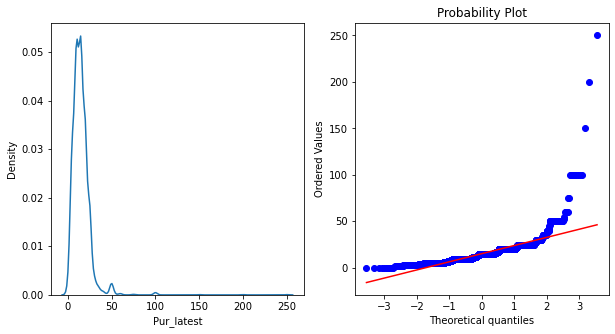

-0.10100767301794152


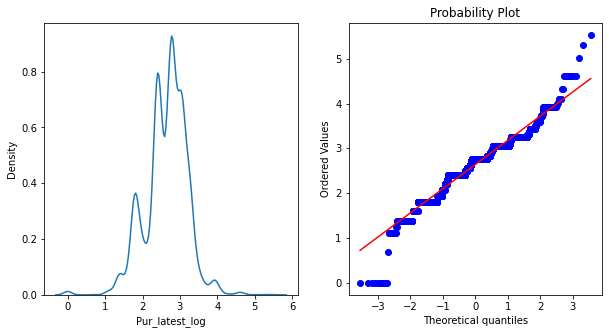

-0.10100767301794152
-0.1429556719956699


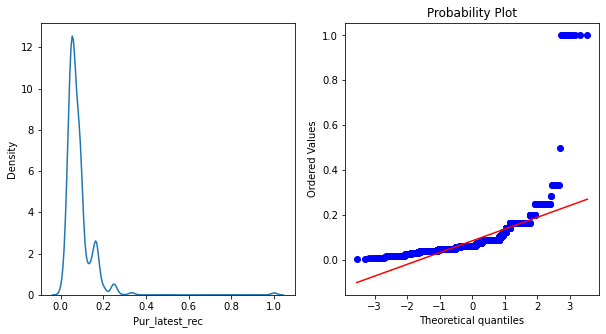

-0.10100767301794152
0.08281545540950944


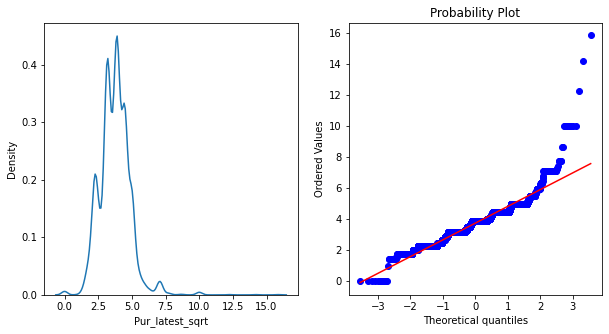

-0.10100767301794152
-0.1341609748216096


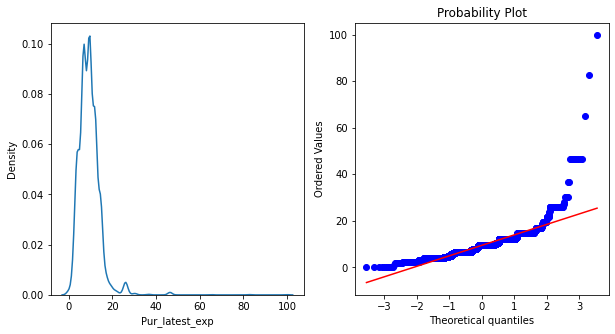

-0.10100767301794152
-0.11555056182427716


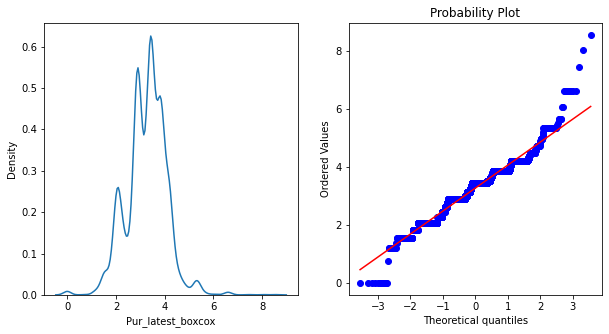

-0.10100767301794152
-0.1431798217033056
Pur_latest
-0.10100767301794152
log  -0.1429556719956699
rec  0.08281545540950944
sqrt  -0.1341609748216096
exp  -0.11555056182427716
boxcox  -0.1431798217033056


In [130]:
# pur_latest variable

normality(dfayie,'Pur_latest')
print(dfayie['Pur_latest'].corr(dfayie['Potential_Customer']))

# transform data
# using log

dfayie['Pur_latest_log']=np.log((dfayie['Pur_latest'])+1)
normality(dfayie,'Pur_latest_log')
print(dfayie['Pur_latest'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_latest_log'].corr(dfayie['Potential_Customer']))

# transform data
# using reciprocal

dfayie['Pur_latest_rec'] = 1/(dfayie['Pur_latest']+1)
normality(dfayie,'Pur_latest_rec')
print(dfayie['Pur_latest'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_latest_rec'].corr(dfayie['Potential_Customer']))

# transform data
# using square root

dfayie['Pur_latest_sqrt']=np.sqrt(dfayie['Pur_latest'])
normality(dfayie,'Pur_latest_sqrt')
print(dfayie['Pur_latest'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_latest_sqrt'].corr(dfayie['Potential_Customer']))

# transform data
# using exponential

dfayie['Pur_latest_exp']=dfayie.Pur_latest**(1/1.2)

normality(dfayie,'Pur_latest_exp')
print(dfayie['Pur_latest'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_latest_exp'].corr(dfayie['Potential_Customer']))

# transform data
# using boxcox

dfayie['Pur_latest_boxcox'],parameters=stats.boxcox(dfayie['Pur_latest']+1)
normality(dfayie,'Pur_latest_boxcox')
print(dfayie['Pur_latest'].corr(dfayie['Potential_Customer']))
print(dfayie['Pur_latest_boxcox'].corr(dfayie['Potential_Customer']))

# display all correlation result

print("Pur_latest")
print(dfayie['Pur_latest'].corr(dfayie['Potential_Customer']))
print("log ", dfayie['Pur_latest_log'].corr(dfayie['Potential_Customer']))
print("rec ", dfayie['Pur_latest_rec'].corr(dfayie['Potential_Customer']))
print("sqrt ", dfayie['Pur_latest_sqrt'].corr(dfayie['Potential_Customer']))
print("exp ", dfayie['Pur_latest_exp'].corr(dfayie['Potential_Customer']))
print("boxcox ", dfayie['Pur_latest_boxcox'].corr(dfayie['Potential_Customer']))

In [131]:
dfayie.head()

,InAct_Last,Ad_Res_Ind_1_Year,Pur_3_years_Avg_Indirect,Pur_3_years_Indirect,Pur_latest,Ad_Res_1_year,Pur_3_years_Avg,Pur_3_years,Ad_Res_Ind_5_Year,Ad_Res_Ind_3_Year,...,Pur_5_years_Avg_log,Pur_5_years_Avg_rec,Pur_5_years_Avg_sqrt,Pur_5_years_Avg_exp,Pur_5_years_Avg_boxcox,Pur_latest_log,Pur_latest_rec,Pur_latest_sqrt,Pur_latest_exp,Pur_latest_boxcox
0,14.0,3.0,7.50,2.0,0.0,32.0,7.50,2.0,16.0,12.0,...,2.170196,0.114155,2.785678,4.196654,1.785748,0.000000,1.000000,0.000000,0.000000,0.000000
1,18.0,6.0,NaN,0.0,25.0,13.0,25.00,1.0,22.0,6.0,...,2.639057,0.071429,3.605551,6.022272,2.085671,3.258097,0.038462,5.000000,14.620089,4.178490
2,19.0,6.0,14.67,3.0,15.0,14.0,15.00,5.0,22.0,17.0,...,2.505526,0.081633,3.354102,5.442604,2.002899,2.772589,0.062500,3.872983,9.551598,3.422283
3,5.0,8.0,NaN,0.0,20.0,17.0,20.00,1.0,33.0,8.0,...,2.598979,0.074349,3.528456,5.842767,2.061043,3.044522,0.047619,4.472136,12.139245,3.839184
4,17.0,6.0,4.00,2.0,3.0,13.0,4.33,3.0,24.0,12.0,...,1.568616,0.208333,1.949359,2.545942,1.360575,1.386294,0.250000,1.732051,2.498050,1.537525


# transform a few numerical variable and append in dataset

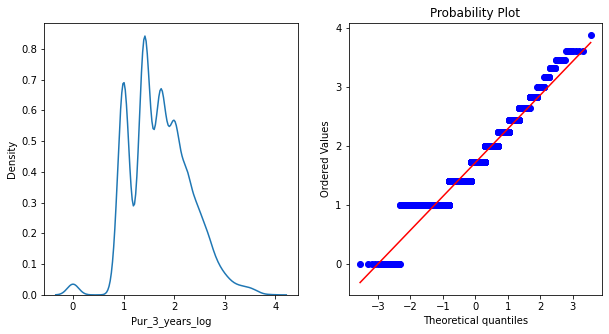

0.1471060158084758
0.15127183576879813


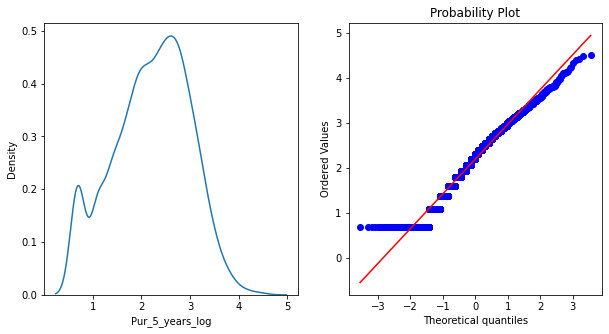

0.09797224101054963
0.12128041010361647


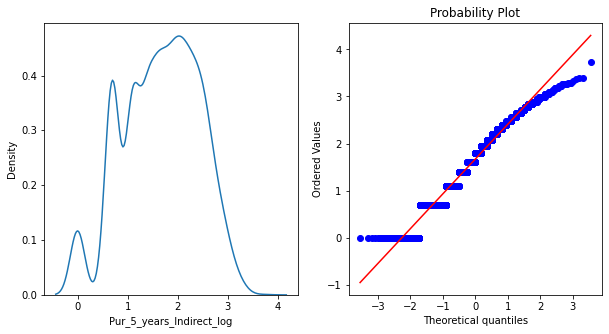

0.09830455623779902
0.11432550429344847


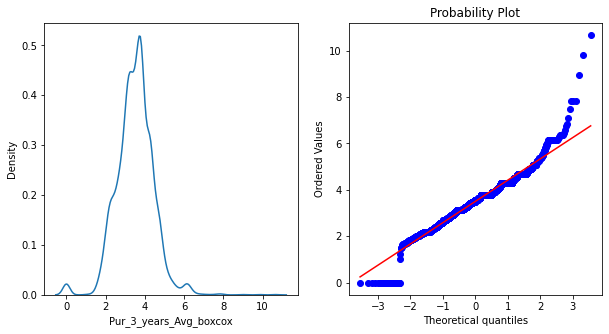

-0.10350393192098015
-0.12701760848653934


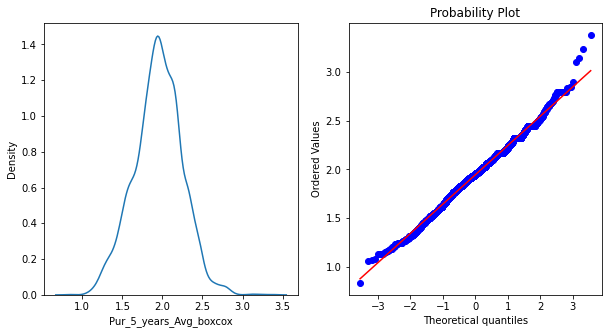

-0.11149970784739276
-0.15021260344091883


In [132]:
da['Pur_3_years_log']=np.sqrt(da['Pur_3_years'])
normality(da,'Pur_3_years_log')
print(da['Pur_3_years'].corr(da['Potential_Customer']))
print(da['Pur_3_years_log'].corr(da['Potential_Customer']))

da['Pur_5_years_log']=np.log((da['Pur_5_years'])+1)
normality(da,'Pur_5_years_log')
print(da['Pur_5_years'].corr(da['Potential_Customer']))
print(da['Pur_5_years_log'].corr(da['Potential_Customer']))

da['Pur_5_years_Indirect_log']=np.log(da['Pur_5_years_Indirect']+1)
normality(da,'Pur_5_years_Indirect_log')
print(da['Pur_5_years_Indirect'].corr(da['Potential_Customer']))
print(da['Pur_5_years_Indirect_log'].corr(da['Potential_Customer']))

da['Pur_3_years_Avg_boxcox'],parameters=stats.boxcox(da['Pur_3_years_Avg']+1)
normality(da,'Pur_3_years_Avg_boxcox')
print(da['Pur_3_years_Avg'].corr(da['Potential_Customer']))
print(da['Pur_3_years_Avg_boxcox'].corr(da['Potential_Customer']))

da['Pur_5_years_Avg_boxcox'],parameters=stats.boxcox(da['Pur_5_years_Avg']+1)
normality(da,'Pur_5_years_Avg_boxcox')
print(da['Pur_5_years_Avg'].corr(da['Potential_Customer']))
print(da['Pur_5_years_Avg_boxcox'].corr(da['Potential_Customer']))

# Transform  by derive from other column and append

In [133]:
# create new column from multiplaction between two column
da["Total_pur_3_years"] = (da["Pur_3_years"]) * (da["Pur_3_years_Avg"])

In [134]:
# create new column from multiplaction between two column
da["Total_pur_5_years"] = (da["Pur_5_years"]) * (da["Pur_5_years_Avg"])

In [135]:
# create new column from addition between two column
da["Total_ad_res_1_years"]=(da["Ad_Res_1_year"]+da["Ad_Res_Ind_1_Year"])

In [136]:
# create new column from addition between two column
da["Total_ad_res_3_years"]=(da["Ad_Res_3_Year"]+da["Ad_Res_Ind_3_Year"])

In [137]:
# create new column from addition between two column
da["Total_ad_res_5_years"]=(da["Ad_Res_5_Year"]+da["Ad_Res_Ind_5_Year"])

# Categorical Variable

In [138]:
CatCols=['Status_Cust','Sex','Cust_Prop', 'Status_Latest_Ad', 'Potential_Customer']

In [139]:
CatCols

['Status_Cust', 'Sex', 'Cust_Prop', 'Status_Latest_Ad', 'Potential_Customer']

In [140]:
dataCat

,Status_Cust,Gender,Cust_Prop,Status_Latest_Ad,Customer_Status,Sex
0,A,F,H,0,active,F
1,A,M,U,1,active,M
2,S,F,U,1,active,F
3,A,F,U,0,active,F
4,S,F,H,1,active,F
...,...,...,...,...,...,...
3613,A,F,H,0,active,F
3614,S,F,H,1,active,F
3615,A,M,U,1,active,M
3616,A,M,H,1,active,M


# Crosstab between status latest ad and target variable

In [141]:
# Crosstab between status latest ad and target variable
Status_Latest_Ad_tab = pd.crosstab(dataCat.loc[:,"Status_Latest_Ad"],
                                   da.loc[:, "Potential_Customer"])
Status_Latest_Ad_tab

Potential_Customer,0.0,1.0
Status_Latest_Ad,,
0,911,650
1,971,1086


# Check relationship between Customer Property and targeted variable

In [142]:
dataCat.Cust_Prop

0       H
1       U
2       U
3       U
4       H
       ..
3613    H
3614    H
3615    U
3616    H
3617    U
Name: Cust_Prop, Length: 3618, dtype: category
Categories (2, object): ['H', 'U']

In [143]:
# check relationship between Customer Property and targeted variable
# convert to dummy variable first

cust_prop_dummies = pd.get_dummies(dataCat.Cust_Prop, prefix="Cust_Prop")
cust_prop_dummiesH = cust_prop_dummies.iloc[:,0]
cust_prop_dummies.head()

,Cust_Prop_H,Cust_Prop_U
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [144]:
# append only Cust_Prop_H to table
dataCat2 = pd.concat([dataCat, cust_prop_dummiesH], axis=1)
dataCat2.head()

,Status_Cust,Gender,Cust_Prop,Status_Latest_Ad,Customer_Status,Sex,Cust_Prop_H
0,A,F,H,0,active,F,1
1,A,M,U,1,active,M,0
2,S,F,U,1,active,F,0
3,A,F,U,0,active,F,0
4,S,F,H,1,active,F,1


In [145]:
# Crosstab between Cust_Prop and target variable
Cust_Prop_Tab = pd.crosstab(dataCat2.loc[:,"Cust_Prop_H"],
                            data.loc[:, "Potential_Customer"])
Cust_Prop_Tab

Potential_Customer,0.0,1.0
Cust_Prop_H,,
0,852,785
1,1030,951


# Check relationship between Gender and targeted variable

In [146]:
# remove unknown gender
dataCat2.shape

(3618, 7)

In [147]:
dataCat2.head()

,Status_Cust,Gender,Cust_Prop,Status_Latest_Ad,Customer_Status,Sex,Cust_Prop_H
0,A,F,H,0,active,F,1
1,A,M,U,1,active,M,0
2,S,F,U,1,active,F,0
3,A,F,U,0,active,F,0
4,S,F,H,1,active,F,1


In [148]:
# check relationship between Gender and targeted variable
# convert to dummy variable first

gender_dummies = pd.get_dummies(dataCat2.Sex, prefix="Sex")
gender_dummies_F = gender_dummies.iloc[:,0]
gender_dummies.head()

,Sex_F,Sex_M
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [149]:
# append only Cust_Prop_H to table
dataCat3 = pd.concat([dataCat2, gender_dummies_F], axis=1)
dataCat3.head()

,Status_Cust,Gender,Cust_Prop,Status_Latest_Ad,Customer_Status,Sex,Cust_Prop_H,Sex_F
0,A,F,H,0,active,F,1,1
1,A,M,U,1,active,M,0,0
2,S,F,U,1,active,F,0,1
3,A,F,U,0,active,F,0,1
4,S,F,H,1,active,F,1,1


In [150]:
# Crosstab between Gender and target variable
gender_tab = pd.crosstab(dataCat3.loc[:,"Sex_F"],
                         data.loc[:, "Potential_Customer"])
gender_tab

Potential_Customer,0.0,1.0
Sex_F,,
0,888,808
1,994,928


# Check relationship between customer status and targeted variable

In [151]:
dataCat3.head()

,Status_Cust,Gender,Cust_Prop,Status_Latest_Ad,Customer_Status,Sex,Cust_Prop_H,Sex_F
0,A,F,H,0,active,F,1,1
1,A,M,U,1,active,M,0,0
2,S,F,U,1,active,F,0,1
3,A,F,U,0,active,F,0,1
4,S,F,H,1,active,F,1,1


In [152]:
# convert to dummy variable first
status_cust_dummies = pd.get_dummies(dataCat3.Customer_Status, prefix="Customer_Status")
status_cust_dummies_A = status_cust_dummies.iloc[:,0]
status_cust_dummies.head()

,Customer_Status_active,Customer_Status_inactive
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [153]:
# append only status_cust_dummies_A to table
dataCat4 = pd.concat([dataCat3, status_cust_dummies_A], axis=1)
dataCat4.head()

,Status_Cust,Gender,Cust_Prop,Status_Latest_Ad,Customer_Status,Sex,Cust_Prop_H,Sex_F,Customer_Status_active
0,A,F,H,0,active,F,1,1,1
1,A,M,U,1,active,M,0,0,1
2,S,F,U,1,active,F,0,1,1
3,A,F,U,0,active,F,0,1,1
4,S,F,H,1,active,F,1,1,1


In [154]:
# Crosstab between Gender and target variable
status_tab = pd.crosstab(dataCat4.loc[:,"Customer_Status_active"],
                         data.loc[:, "Potential_Customer"])
status_tab

Potential_Customer,0.0,1.0
Customer_Status_active,,
0,308,200
1,1574,1536


# Relationship between customer status and targeted variable

## 4.2 Check Correlation between Numerical Variables

In [155]:
da.head().T

,0,1,2,3,4
InAct_Last,14,18,19,5,17
Ad_Res_Ind_1_Year,3,6,6,8,6
Pur_3_years_Avg_Indirect,7.5,NaN,14.67,NaN,4
Pur_3_years_Indirect,2,0,3,0,2
Pur_latest,0,25,15,20,3
Ad_Res_1_year,32,13,14,17,13
Pur_3_years_Avg,7.5,25,15,20,4.33
Pur_3_years,2,1,5,1,3
Ad_Res_Ind_5_Year,16,22,22,33,24
Ad_Res_Ind_3_Year,12,6,17,8,12


In [156]:
cor = da.corr()
cor

,InAct_Last,Ad_Res_Ind_1_Year,Pur_3_years_Avg_Indirect,Pur_3_years_Indirect,Pur_latest,Ad_Res_1_year,Pur_3_years_Avg,Pur_3_years,Ad_Res_Ind_5_Year,Ad_Res_Ind_3_Year,...,Pur_3_years_log,Pur_5_years_log,Pur_5_years_Indirect_log,Pur_3_years_Avg_boxcox,Pur_5_years_Avg_boxcox,Total_pur_3_years,Total_pur_5_years,Total_ad_res_1_years,Total_ad_res_3_years,Total_ad_res_5_years
InAct_Last,1.000000,-0.356574,0.087836,-0.168513,0.132908,-0.564820,0.091458,-0.237964,-0.138193,-0.175138,...,-0.236985,-0.231262,-0.163179,0.157966,0.145341,-0.121982,-0.182046,-0.552528,-0.313943,-0.214102
Ad_Res_Ind_1_Year,-0.356574,1.000000,0.010423,0.274756,0.001693,0.661544,0.019759,0.344823,0.402181,0.611498,...,0.363740,0.305917,0.236330,0.014026,-0.038884,0.328010,0.260938,0.780443,0.745310,0.411101
Pur_3_years_Avg_Indirect,0.087836,0.010423,1.000000,-0.300027,0.742934,0.096935,0.976536,-0.376704,-0.100258,-0.053453,...,-0.397224,-0.286925,-0.260326,0.860673,0.722839,0.523472,0.262349,0.082711,-0.008580,-0.079484
Pur_3_years_Indirect,-0.168513,0.274756,-0.300027,1.000000,-0.296213,0.165172,-0.293545,0.842210,0.252604,0.639989,...,0.815283,0.465517,0.560424,-0.379297,-0.426504,0.386660,0.198298,0.200599,0.452131,0.239927
Pur_latest,0.132908,0.001693,0.742934,-0.296213,1.000000,0.033439,0.786184,-0.349252,-0.121806,-0.133058,...,-0.347282,-0.300265,-0.285712,0.723382,0.672958,0.408983,0.187151,0.028267,-0.069836,-0.112142
Ad_Res_1_year,-0.564820,0.661544,0.096935,0.165172,0.033439,1.000000,0.085542,0.197819,0.329764,0.357592,...,0.182100,0.307318,0.201967,0.017043,0.042193,0.286345,0.403456,0.985159,0.687596,0.478998
Pur_3_years_Avg,0.091458,0.019759,0.976536,-0.293545,0.786184,0.085542,1.000000,-0.355583,-0.096414,-0.115329,...,-0.340856,-0.285696,-0.264634,0.862076,0.717066,0.501033,0.246633,0.075842,-0.024606,-0.080094
Pur_3_years,-0.237964,0.344823,-0.376704,0.842210,-0.349252,0.197819,-0.355583,1.000000,0.330041,0.593459,...,0.973167,0.572135,0.535895,-0.450846,-0.528876,0.457645,0.228605,0.243855,0.509194,0.312740
Ad_Res_Ind_5_Year,-0.138193,0.402181,-0.100258,0.252604,-0.121806,0.329764,-0.096414,0.330041,1.000000,0.487999,...,0.345706,0.869067,0.828230,-0.120285,-0.333388,0.230985,0.577770,0.366992,0.641328,0.970268
Ad_Res_Ind_3_Year,-0.175138,0.611498,-0.053453,0.639989,-0.133058,0.357592,-0.115329,0.593459,0.487999,1.000000,...,0.641136,0.522456,0.554688,-0.130964,-0.236353,0.446488,0.322665,0.438103,0.841537,0.464574


<AxesSubplot:>

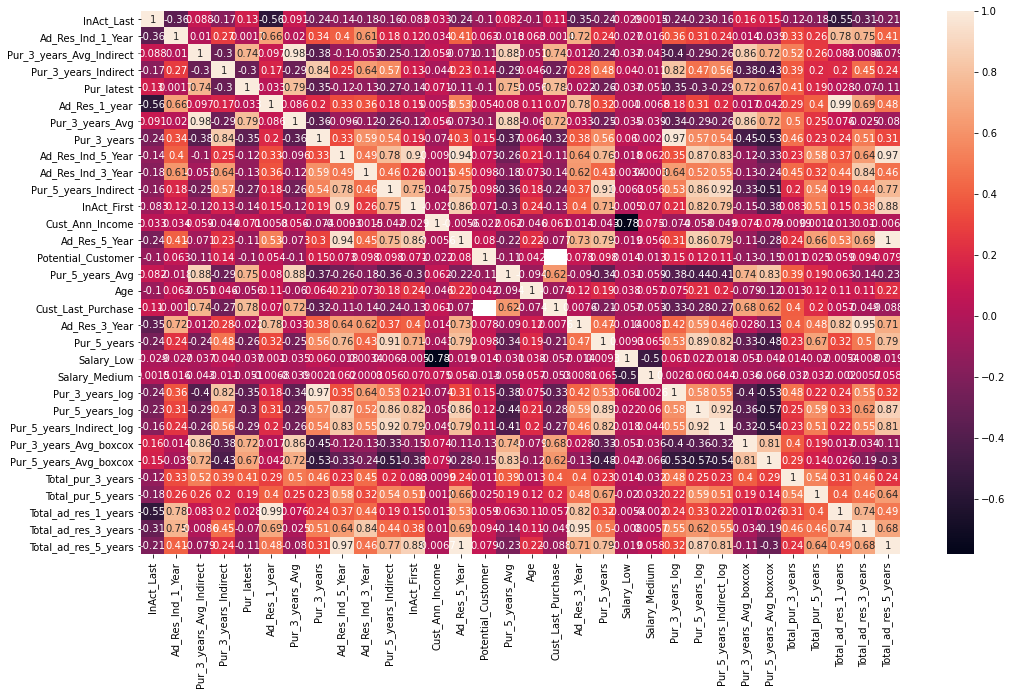

In [157]:
plt.figure(figsize=(17,10))
sns.heatmap(cor, annot=True)

# <font color=green>5. Feature Selection<font>

Remove numerical columns with high correlations as they confuse the machine learning algorithms.

Feature selection Numerical

In [158]:
da.corr()['Potential_Customer'].sort_values(ascending=False)

Potential_Customer          1.000000
Pur_3_years_log             0.151272
Pur_3_years                 0.147106
Pur_3_years_Indirect        0.135133
Pur_5_years_log             0.121280
Pur_5_years_Indirect_log    0.114326
Pur_5_years_Indirect        0.098305
Pur_5_years                 0.097972
Ad_Res_Ind_3_Year           0.097746
Total_ad_res_3_years        0.093729
Ad_Res_5_Year               0.080109
Total_ad_res_5_years        0.079065
Ad_Res_3_Year               0.077662
Ad_Res_Ind_5_Year           0.073056
InAct_First                 0.070813
Ad_Res_Ind_1_Year           0.063209
Total_ad_res_1_years        0.059448
Ad_Res_1_year               0.053949
Age                         0.042249
Total_pur_5_years           0.024750
Salary_Low                  0.014474
Total_pur_3_years           0.010894
Salary_Medium              -0.012518
Cust_Ann_Income            -0.021580
Pur_latest                 -0.101008
InAct_Last                 -0.103023
Pur_3_years_Avg            -0.103504
P

Feature selection Categorical

In [159]:
from scipy.stats import chi2_contingency
alpha = 0.5


print("Status_Latest_Ad")
stat, p_value, dof, expected = chi2_contingency(Status_Latest_Ad_tab, correction=False)
print("Chi Square score: ", stat)
print("P value score: ", p_value)
if p_value < alpha: 
    print('There IS a correlation with Potential Customer'.format(round(p_value,7)))
else:
    print('There is NO correlation with Potential Customer'.format(round(p_value,7)))
    
    
print("\n*************\n")


print("Customer_Prop")
stat, p_value, dof, expected = chi2_contingency(Cust_Prop_Tab, correction=False)
print("Chi Square score: ", stat)
print("P value score: ", p_value)
if p_value < alpha: 
    print('There IS a correlation with Potential Customer'.format(round(p_value,7)))
else:
    print('There is NO correlation with Potential Customer'.format(round(p_value,7)))


print("\n*************\n")


print("Gender")
stat, p_value, dof, expected = chi2_contingency(gender_tab, correction=False)
print("Chi Square score: ", stat)
print("P value score: ", p_value)
if p_value < alpha: 
    print('There IS a correlation with Potential Customer'.format(round(p_value,7)))
else:
    print('There is NO correlation with Potential Customer'.format(round(p_value,7)))
    
    
print("\n*************\n")


print("Customer Status")
stat, p_value, dof, expected = chi2_contingency(status_tab, correction=False)
print("Chi Square score: ", stat)
print("P value score: ", p_value)
if p_value < alpha: 
    print('There IS a correlation with Potential Customer'.format(round(p_value,7)))
else:
    print('There is NO correlation with Potential Customer'.format(round(p_value,7)))

Status_Latest_Ad
Chi Square score:  44.24900315468044
P value score:  2.891515983154045e-11
There IS a correlation with Potential Customer

*************

Customer_Prop
Chi Square score:  0.0009892024404620607
P value score:  0.974909399535142
There is NO correlation with Potential Customer

*************

Gender
Chi Square score:  0.14856316114875875
P value score:  0.6999122517231744
There is NO correlation with Potential Customer

*************

Customer Status
Chi Square score:  17.56188402139265
P value score:  2.7810721997019303e-05
There IS a correlation with Potential Customer


Select variables that have p_value below than 0.05 and big chi squared values - Customer Statis and Status Latest Ad

# <font color=green>6. Data PreProcessing<font>

## 6.1 Separate X (features) and y (target)

Exclude the column `Cust_Last_Purchase` from the analysis

In [160]:
da.head().T

,0,1,2,3,4
InAct_Last,14,18,19,5,17
Ad_Res_Ind_1_Year,3,6,6,8,6
Pur_3_years_Avg_Indirect,7.5,NaN,14.67,NaN,4
Pur_3_years_Indirect,2,0,3,0,2
Pur_latest,0,25,15,20,3
Ad_Res_1_year,32,13,14,17,13
Pur_3_years_Avg,7.5,25,15,20,4.33
Pur_3_years,2,1,5,1,3
Ad_Res_Ind_5_Year,16,22,22,33,24
Ad_Res_Ind_3_Year,12,6,17,8,12


In [161]:
da2 = ['Pur_3_years_log','Pur_5_years_log','Pur_5_years_Indirect_log','Pur_3_years_Avg_boxcox','Pur_5_years_Avg_boxcox',
      'Total_pur_3_years','Total_pur_5_years','Total_ad_res_1_years','Total_ad_res_3_years','Total_ad_res_5_years',
      'Potential_Customer']

da[da2]

,Pur_3_years_log,Pur_5_years_log,Pur_5_years_Indirect_log,Pur_3_years_Avg_boxcox,Pur_5_years_Avg_boxcox,Total_pur_3_years,Total_pur_5_years,Total_ad_res_1_years,Total_ad_res_3_years,Total_ad_res_5_years,Potential_Customer
0,1.414214,2.890372,1.609438,2.710787,1.785748,15.00,131.92,35.0,60.0,89.0,1.0
1,1.000000,2.079442,1.386294,4.701438,2.085671,25.00,91.00,19.0,41.0,77.0,1.0
2,2.236068,2.564949,1.791759,3.778562,2.002899,75.00,135.00,20.0,52.0,75.0,0.0
3,1.000000,2.484907,1.386294,4.283695,2.061043,20.00,136.95,25.0,46.0,104.0,1.0
4,1.732051,2.772589,2.079442,2.010144,1.360575,12.99,57.00,19.0,40.0,87.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3613,1.414214,1.945910,0.693147,3.941802,2.099904,33.00,79.98,19.0,40.0,64.0,1.0
3614,2.645751,3.465736,3.091042,3.504393,1.986774,88.97,339.14,19.0,49.0,123.0,0.0
3615,2.645751,2.639057,2.197225,3.468445,1.969600,87.01,138.06,23.0,54.0,81.0,0.0
3616,1.000000,2.484907,2.079442,4.283695,2.221161,20.00,182.05,17.0,46.0,86.0,0.0


In [162]:
dafinal = da[da2]

In [163]:
dafinal.head().T

,0,1,2,3,4
Pur_3_years_log,1.414214,1.000000,2.236068,1.000000,1.732051
Pur_5_years_log,2.890372,2.079442,2.564949,2.484907,2.772589
Pur_5_years_Indirect_log,1.609438,1.386294,1.791759,1.386294,2.079442
Pur_3_years_Avg_boxcox,2.710787,4.701438,3.778562,4.283695,2.010144
Pur_5_years_Avg_boxcox,1.785748,2.085671,2.002899,2.061043,1.360575
Total_pur_3_years,15.000000,25.000000,75.000000,20.000000,12.990000
Total_pur_5_years,131.920000,91.000000,135.000000,136.950000,57.000000
Total_ad_res_1_years,35.000000,19.000000,20.000000,25.000000,19.000000
Total_ad_res_3_years,60.000000,41.000000,52.000000,46.000000,40.000000
Total_ad_res_5_years,89.000000,77.000000,75.000000,104.000000,87.000000


## 6.2 Dummy Variables
Change categorical variables with numerical variabels

In [164]:
dataCat

,Status_Cust,Gender,Cust_Prop,Status_Latest_Ad,Customer_Status,Sex
0,A,F,H,0,active,F
1,A,M,U,1,active,M
2,S,F,U,1,active,F
3,A,F,U,0,active,F
4,S,F,H,1,active,F
...,...,...,...,...,...,...
3613,A,F,H,0,active,F
3614,S,F,H,1,active,F
3615,A,M,U,1,active,M
3616,A,M,H,1,active,M


In [165]:
# convert to dummy variable first

status_cust_dummies = pd.get_dummies(dataCat.Customer_Status, prefix="Customer_Status")
status_cust_dummies_A = status_cust_dummies.iloc[:,0]
status_cust_dummies.head()

# append only status_cust_dummies_A to table
dataCat = pd.concat([dataCat, status_cust_dummies_A], axis=1)

In [166]:
dataCat.head().T

,0,1,2,3,4
Status_Cust,A,A,S,A,S
Gender,F,M,F,F,F
Cust_Prop,H,U,U,U,H
Status_Latest_Ad,0,1,1,0,1
Customer_Status,active,active,active,active,active
Sex,F,M,F,F,F
Customer_Status_active,1,1,1,1,1


In [167]:
Status_Latest_Ad = dataCat["Status_Latest_Ad"]
allData = pd.concat([dafinal, Status_Latest_Ad], axis=1)

In [168]:
Customer_Status_active = dataCat["Customer_Status_active"]
allData = pd.concat([allData, Customer_Status_active], axis=1)

In [169]:
allData.head()

,Pur_3_years_log,Pur_5_years_log,Pur_5_years_Indirect_log,Pur_3_years_Avg_boxcox,Pur_5_years_Avg_boxcox,Total_pur_3_years,Total_pur_5_years,Total_ad_res_1_years,Total_ad_res_3_years,Total_ad_res_5_years,Potential_Customer,Status_Latest_Ad,Customer_Status_active
0,1.414214,2.890372,1.609438,2.710787,1.785748,15.00,131.92,35.0,60.0,89.0,1.0,0,1
1,1.000000,2.079442,1.386294,4.701438,2.085671,25.00,91.00,19.0,41.0,77.0,1.0,1,1
2,2.236068,2.564949,1.791759,3.778562,2.002899,75.00,135.00,20.0,52.0,75.0,0.0,1,1
3,1.000000,2.484907,1.386294,4.283695,2.061043,20.00,136.95,25.0,46.0,104.0,1.0,0,1
4,1.732051,2.772589,2.079442,2.010144,1.360575,12.99,57.00,19.0,40.0,87.0,1.0,1,1


In [170]:
#Separate X (features) and y (target)
X = allData.drop('Potential_Customer', axis=1)
y = allData['Potential_Customer']
X.head().T

,0,1,2,3,4
Pur_3_years_log,1.414214,1.000000,2.236068,1.000000,1.732051
Pur_5_years_log,2.890372,2.079442,2.564949,2.484907,2.772589
Pur_5_years_Indirect_log,1.609438,1.386294,1.791759,1.386294,2.079442
Pur_3_years_Avg_boxcox,2.710787,4.701438,3.778562,4.283695,2.010144
Pur_5_years_Avg_boxcox,1.785748,2.085671,2.002899,2.061043,1.360575
Total_pur_3_years,15.000000,25.000000,75.000000,20.000000,12.990000
Total_pur_5_years,131.920000,91.000000,135.000000,136.950000,57.000000
Total_ad_res_1_years,35.000000,19.000000,20.000000,25.000000,19.000000
Total_ad_res_3_years,60.000000,41.000000,52.000000,46.000000,40.000000
Total_ad_res_5_years,89.000000,77.000000,75.000000,104.000000,87.000000


## 6.3 Split data to train/test 

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

## 6.4 Feature Scaling

In [172]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

## 6.5 PCA on Numerical Columns only


In [173]:
from sklearn.decomposition import PCA

In [174]:
# 1) Save the caled train and test data, as dataframe with proper column names

X_train_sc= pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_sc= pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [175]:
NewNumCols = X.columns.tolist()

In [176]:
print(NewNumCols) 

['Pur_3_years_log', 'Pur_5_years_log', 'Pur_5_years_Indirect_log', 'Pur_3_years_Avg_boxcox', 'Pur_5_years_Avg_boxcox', 'Total_pur_3_years', 'Total_pur_5_years', 'Total_ad_res_1_years', 'Total_ad_res_3_years', 'Total_ad_res_5_years', 'Status_Latest_Ad', 'Customer_Status_active']


In [177]:
NewNumCols.remove("Status_Latest_Ad")
NewNumCols.remove("Customer_Status_active")
print(NewNumCols)

['Pur_3_years_log', 'Pur_5_years_log', 'Pur_5_years_Indirect_log', 'Pur_3_years_Avg_boxcox', 'Pur_5_years_Avg_boxcox', 'Total_pur_3_years', 'Total_pur_5_years', 'Total_ad_res_1_years', 'Total_ad_res_3_years', 'Total_ad_res_5_years']


In [178]:
# 2) Separate train and test data for numerical columns only

train_PCA=X_train_sc[NewNumCols]
test_PCA=X_test_sc[NewNumCols]

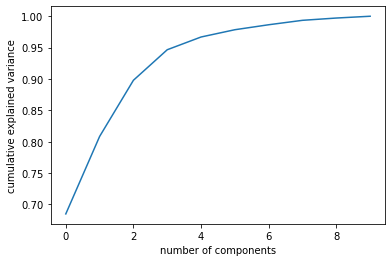

In [179]:
# 3) Define the number of components on train_PCA

pca = PCA().fit(train_PCA)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [180]:
# 4) Fit PCA and transform on train_PCA 

pca = PCA(n_components=4)
pca.fit(train_PCA)
PCA_train = pca.transform(train_PCA)
PCA_test = pca.transform(test_PCA)

# Save PCA as DataFrame

PCA_train = pd.DataFrame(PCA_train)
PCA_test = pd.DataFrame(PCA_test)

In [181]:
# make sure PCA_train have the same index with X_train
PCA_train.index=X_train.index
PCA_test.index=X_test.index

In [182]:
#PCA_train

In [183]:
# 5) Concat to dummy variables
dummyCols = ["Status_Latest_Ad","Customer_Status_active"]

X_train_pca = pd.concat([X_train[dummyCols],PCA_train], axis = 1)
X_test_pca = pd.concat([X_test[dummyCols],PCA_test], axis = 1)

In [184]:
X_train_pca.shape

(2713, 6)

In [185]:
#X_train_pca.head().T

# <font color=green>7. Machine Learning<font>

Apply various ML algorithms on the data.

# Model Selection

## KNN

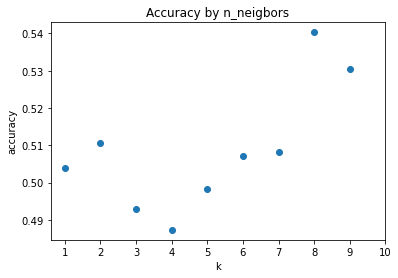

In [186]:
k_range = range(1,10)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    knn.fit(X_train_pca, y_train)
    scores.append(knn.score(X_test_pca, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy by n_neigbors')
plt.scatter(k_range, scores)
plt.xticks([1,2,3,4,5,6,7,8,9,10]);

In [187]:
M_knn = KNeighborsClassifier(n_neighbors=8,p=1 )
E_knn=KNeighborsClassifier(n_neighbors=8, p=2)

M_knn.fit(X_train, y_train)
E_knn.fit(X_train, y_train)


print('****** Manhatan Distance ******')

print('Manhatan: Accuracy: {} \n'.format(M_knn.score(X_test, y_test)))

print('****** Euclidian Distance ******')
print('Euclidian: Accuracy: {} \n'.format(E_knn.score(X_test, y_test)))

****** Manhatan Distance ******
Manhatan: Accuracy: 0.5248618784530387 

****** Euclidian Distance ******
Euclidian: Accuracy: 0.5259668508287293 



## Decision Tree

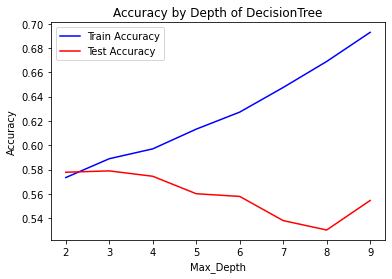

In [188]:
train_acc = []
test_acc = []

for i in range(2,10):
    tree1 = DecisionTreeClassifier(max_depth=i, random_state=0)
    tree1.fit(X_train_pca, y_train)

    train_acc.append(tree1.score(X_train_pca, y_train))
    test_acc.append(tree1.score(X_test_pca, y_test))
    
plt.plot(range (2,10),train_acc,'b-', label='Train Accuracy')
plt.plot(range (2,10),test_acc,'r-', label='Test Accuracy')
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy by Depth of DecisionTree')
plt.show()

In [189]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train_pca, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test_pca, y_test)))

Accuracy on training set: 0.574
Accuracy on test set: 0.578


### Logistic Regression

In [190]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(C=2.78, max_iter=5000, penalty='l1', solver='saga')
logr.fit(X_train_pca, y_train)
logr_y_pred = logr.predict(X_test_pca)
print('Accuracy on Train: ',logr.score(X_train_pca, y_train)) 
print('Accuracy on Test: ',logr.score(X_test_pca, y_test)) 

Accuracy on Train:  0.5709546627349797
Accuracy on Test:  0.5513812154696133


## Cross Validation scores

In [191]:
from sklearn.model_selection import cross_val_score

#KNN
model= KNeighborsClassifier(n_neighbors=7, p =1)
scoresKNN = cross_val_score(model,X, y, cv=7)  
scoresKNN
print("Accuracy for KNN: {}".format(scoresKNN.mean()))

#Decision Tree
scoresDT = cross_val_score(tree,X, y, cv=7)   
scoresDT
print("Accuracy for Decision Tree: {}".format(scoresDT.mean()))

#Linear Regression

scoreslogr = cross_val_score(logr,X, y, cv=7)   
scoreslogr
print("Accuracy for Linear Regression: {}".format(scoreslogr.mean()))

Accuracy for KNN: 0.5273566941058282
Accuracy for Decision Tree: 0.564400633178466
Accuracy for Linear Regression: 0.5616411874452448


## How to Get the Optimal Parameter

In [192]:
Temporary_df = allData.copy()

In [193]:
from sklearn.model_selection import GridSearchCV

In [194]:
penalty=['l1','l2']
c=np.logspace(0,4,10)

In [195]:
gridmodel=GridSearchCV(logr,param_grid={'C':c,'penalty':penalty})

In [196]:
gridmodel.fit(X_train_pca,y_train)

GridSearchCV(estimator=LogisticRegression(C=2.78, max_iter=5000, penalty='l1',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [197]:
gridmodel.best_params_

{'C': 7.742636826811269, 'penalty': 'l1'}

In [198]:
gridmodel.best_estimator_

LogisticRegression(C=7.742636826811269, max_iter=5000, penalty='l1',
                   solver='saga')

## Model's coefficients on Logistic Regression

In [199]:
coeff=logr.coef_
coeff

array([[ 0.24024679, -0.04123372,  0.48360419, -0.96547291, -0.98915342,
         1.01184441]])

In [200]:
allData_corr=allData.corr()['Potential_Customer'].sort_values(ascending = False)
allData_corr

Potential_Customer          1.000000
Pur_3_years_log             0.151272
Pur_5_years_log             0.121280
Pur_5_years_Indirect_log    0.114326
Total_ad_res_3_years        0.093729
Total_ad_res_5_years        0.079065
Customer_Status_active      0.069671
Total_ad_res_1_years        0.059448
Total_pur_5_years           0.024750
Total_pur_3_years           0.010894
Pur_3_years_Avg_boxcox     -0.127018
Pur_5_years_Avg_boxcox     -0.150213
Name: Potential_Customer, dtype: float64

In [201]:
no_Potential_Customer =allData.drop('Potential_Customer',axis=1)

In [202]:
no_Potential_Customer.keys()

Index(['Pur_3_years_log', 'Pur_5_years_log', 'Pur_5_years_Indirect_log',
       'Pur_3_years_Avg_boxcox', 'Pur_5_years_Avg_boxcox', 'Total_pur_3_years',
       'Total_pur_5_years', 'Total_ad_res_1_years', 'Total_ad_res_3_years',
       'Total_ad_res_5_years', 'Status_Latest_Ad', 'Customer_Status_active'],
      dtype='object')

In [203]:
#Sort Coeff

coeff_sort={}
a=0
for i in coeff[0]:
    coeff_sort[no_Potential_Customer.keys()[a]]=coeff[0][a]
    a=a+1


In [204]:
coeff_sort

{'Pur_3_years_log': 0.24024679088288034,
 'Pur_5_years_log': -0.04123371619151806,
 'Pur_5_years_Indirect_log': 0.48360419392361603,
 'Pur_3_years_Avg_boxcox': -0.9654729082909023,
 'Pur_5_years_Avg_boxcox': -0.9891534150982496,
 'Total_pur_3_years': 1.0118444145852614}

In [205]:
df_coefsort= pd.DataFrame(list(coeff_sort.items()),columns = ['Feature','Coefficent'])
df_coefsort.sort_values('Coefficent')

,Feature,Coefficent
4,Pur_5_years_Avg_boxcox,-0.989153
3,Pur_3_years_Avg_boxcox,-0.965473
1,Pur_5_years_log,-0.041234
0,Pur_3_years_log,0.240247
2,Pur_5_years_Indirect_log,0.483604
5,Total_pur_3_years,1.011844


## Visualization of the coefficients

In [206]:
df_coefsort=df_coefsort.sort_values('Coefficent')

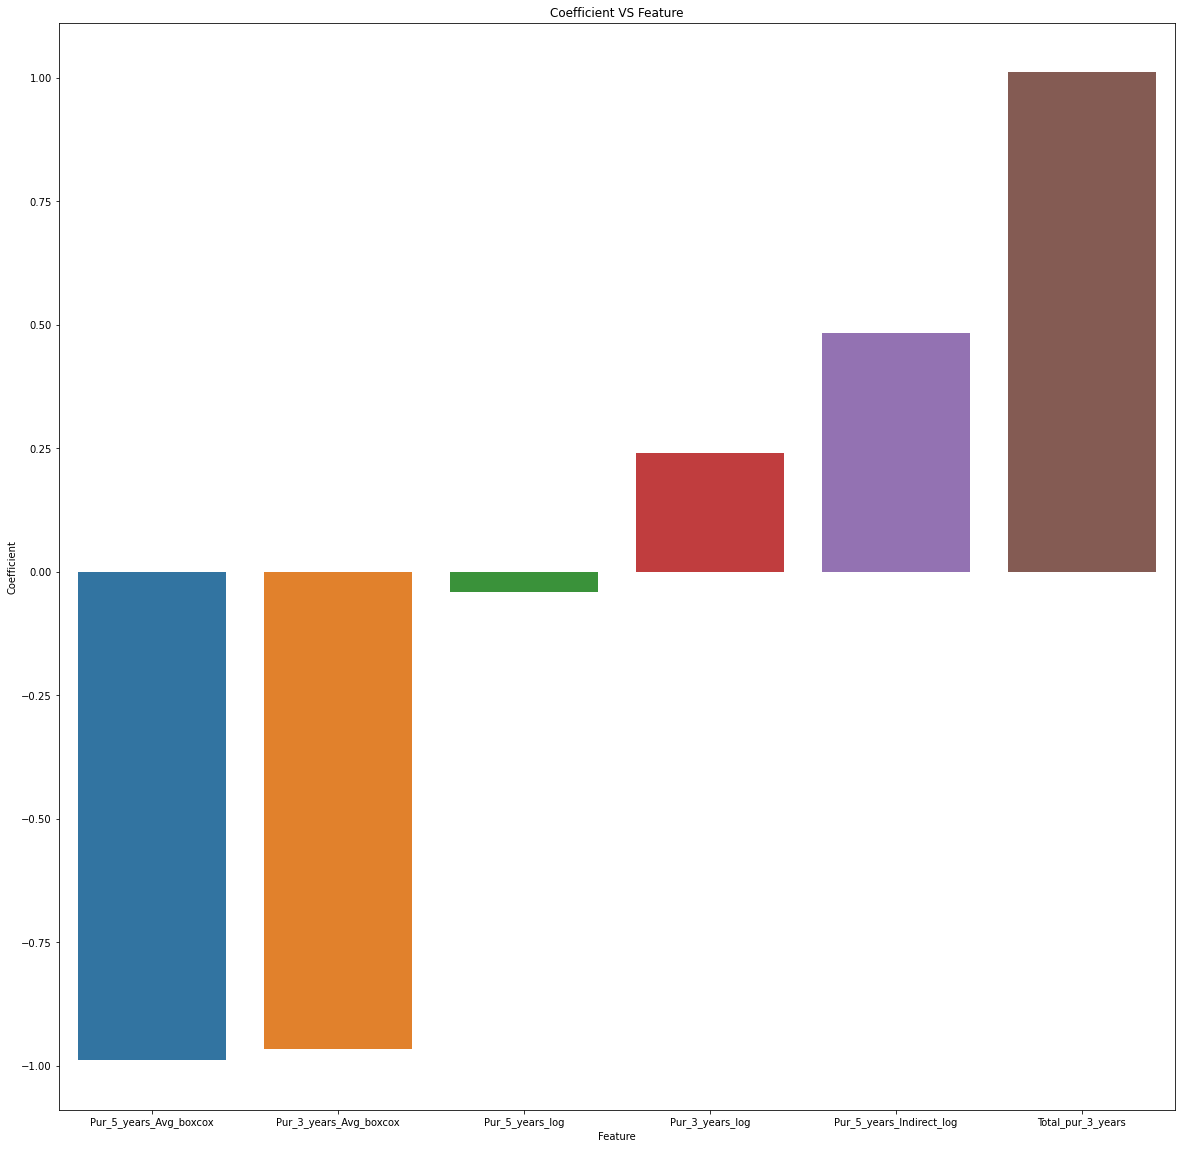

In [207]:
fig=plt.figure(figsize=(20,20))
sns.barplot(y=sorted(coeff_sort.values()),x=sorted(coeff_sort, key=coeff_sort.get),data=df_coefsort)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Coefficient VS Feature')
plt.savefig('coeff.jpg',bbox_inches='tight')

## Model Performance Evaluation

In [208]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix,recall_score,precision_score,f1_score

In [209]:
y_pred = logr.predict(X_test_pca)

In [210]:
confusion_matrix(y_test,y_pred)

array([[294, 177],
       [229, 205]], dtype=int64)

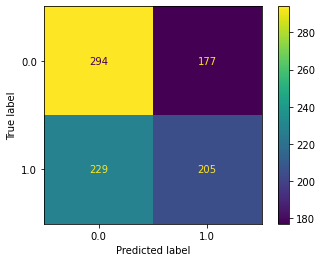

In [211]:
plot_confusion_matrix(logr,X_test_pca,y_test)
plt.savefig('confusion.jpg',bbox_inches='tight')

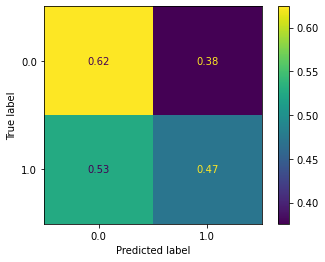

In [212]:
plot_confusion_matrix(logr,X_test_pca,y_test,normalize="true")

In [213]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.56      0.62      0.59       471
         1.0       0.54      0.47      0.50       434

    accuracy                           0.55       905
   macro avg       0.55      0.55      0.55       905
weighted avg       0.55      0.55      0.55       905



## Evaluating Curve and AUC

In [214]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

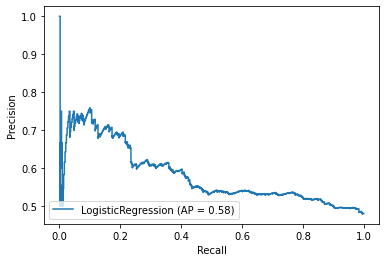

In [215]:
plot_precision_recall_curve(logr,X_test_pca,y_test)
plt.savefig('prc.jpg',bbox_inches='tight')

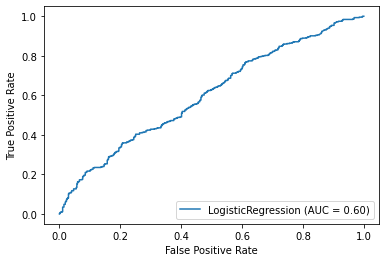

In [216]:
plot_roc_curve(logr,X_test_pca,y_test)
plt.savefig('roc.jpg',bbox_inches='tight')